Projeto de An√°lise Preditiva de Inadimpl√™ncia
-


-  Objetivo
O projeto tem como finalidade prever a inadimpl√™ncia de clientes no momento de solicita√ß√£o de um cart√£o de cr√©dito. O desafio √© identificar, com base em informa√ß√µes hist√≥ricas e cadastrais, quais clientes ter√£o maior probabilidade de n√£o pagar sua d√≠vida, ajudando a fintech a tomar melhores decis√µes de concess√£o de cr√©dito.

        Dados Utilizados:

Trabalhamos com tr√™s datasets principais:
- application_train_dataset.csv - Base principal com dados demogr√°ficos, socioecon√¥micos e comportamentais dos clientes.
- customers_target_and_decision_dataset.csv - Cont√©m a vari√°vel-alvo (default, que indica inadimpl√™ncia) e informa√ß√µes sobre a decis√£o da concess√£o de cr√©dito.
- unstructured_dataset.csv - Base com informa√ß√µes textuais ou n√£o estruturadas que podem enriquecer a an√°lise.

Os datasets foram unidos e estruturados no dataframe principal chamado df_unique.

        Credit_card_initial_line:
- O limite inicial do cart√£o de cr√©dito que fornecemos ao cliente

        Default:
- Se o cliente pagou (0) ou deu calote (1) no nosso cart√£o de cr√©dito. Este √© o alvo (vari√°vel target)	

        Age:
- idade do cliente	

        Amt_active_loan:
- valor do saldo em empr√©stimos de outras institui√ß√µes na data da solicita√ß√£o	

        Channel:
- canal usado para a solicita√ß√£o	

        Ext_score_1:
- pontua√ß√£o de cr√©dito externa 1	

        Ext_score_2:
- pontua√ß√£o de cr√©dito externa 2	

        Ext_score_3:
- pontua√ß√£o de cr√©dito externa 3	

        Ext_score_4:
- pontua√ß√£o de cr√©dito externa 4	

        Flag_document_A:
- se o documento A foi fornecido na solicita√ß√£o

        Gender:
- g√™nero do cliente	

        Ids:
- ID √∫nico da pessoa	

        Income:
- renda anual do cliente	

        Occupation_type:
- ocupa√ß√£o do cliente	

        Score_checks:
- n√∫mero de consultas de cr√©dito feitas para o cliente no ano anterior	

        Score_date:
- data em que o cliente solicitou o cart√£o de cr√©dito	

        Start_hour:
- hor√°rio truncado em que a solicita√ß√£o foi recebida	


        Payment:
- valor pago naquele m√™s	

        Date:
- data de pagamento	

        Credit_line:
- limite de cr√©dito naquele m√™s	

        Spends:
- valor gasto naquele m√™s	


In [ ]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from scipy.stats import ks_2samp
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import kruskal
from scipy.stats import shapiro, mannwhitneyu
from scipy.stats import brunnermunzel
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [9]:
# Carregando o dataset

df_train = pd.read_csv('../data/application_train_dataset.csv', sep=',', index_col=0)

In [10]:
df_train.head()

age  amt_active_loan                   channel  ext_score_1  \
0   37           4560.0  NCqL3QBx0pscDnx3ixKwXg==        467.0   
1   47              NaN  NCqL3QBx0pscDnx3ixKwXg==        470.0   
2   23              0.0  NCqL3QBx0pscDnx3ixKwXg==        533.0   
3   42              NaN  NCqL3QBx0pscDnx3ixKwXg==        522.0   
4   46          47720.0  NCqL3QBx0pscDnx3ixKwXg==        324.0   

                ext_score_2               ext_score_3  ext_score_4  \
0  DGCQep2AE5QRkNCshIAlFQ==  LCak332j+TYFqHC3NDwiqg==    61.311861   
1  e4NYDor1NOw6XKGE60AWFw==  +2hzpeP1RWr8PEvL1WTUdw==    76.095384   
2  DGCQep2AE5QRkNCshIAlFQ==  LCak332j+TYFqHC3NDwiqg==    55.010052   
3  fyrlulOiZ+5hoFqLa6UbDQ==  NLvAOzzmJba/0zolQnWF5Q==    70.809549   
4  fyrlulOiZ+5hoFqLa6UbDQ==  Fv28Bz0YRTVAT5kl1bAV6g==    71.497943   

  flag_document_A gender                                   ids     income  \
0             NaN      m  648384b9-f932-d221-45d7-85d0aa0a412c   86301.53   
1           False      m  ee6a5953-cd50-a004-11d0-58ef2787ffcb   69583.23   
2           False      f  4776fd82-f728-d66b-6fb8-41a8f80a3cd3   79681.63   
3            True      f  70e34497-7bdd-32e2-b8e0-3ffb09265f4f   44753.20   
4            True      f  46f536d5-9d1a-ce94-b67b-76e99dd48e1d  191517.40   

                                     occupation_type  score_checks  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...           8.0   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...           NaN   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...           7.0   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...           NaN   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...          20.0   

   score_date  start_hour  
0  2017-01-15         9.0  
1  2017-01-20        21.0  
2  2017-01-15        15.0  
3  2017-01-25        19.0  
4  2017-01-13        11.0

In [11]:
df_train.dtypes

age                  int64
amt_active_loan    float64
channel             object
ext_score_1        float64
ext_score_2         object
ext_score_3         object
ext_score_4        float64
flag_document_A     object
gender              object
ids                 object
income             float64
occupation_type     object
score_checks       float64
score_date          object
start_hour         float64
dtype: object

In [12]:
df_train.isnull().sum()

age                    0
amt_active_loan    23652
channel              915
ext_score_1          915
ext_score_2          915
ext_score_3          915
ext_score_4            0
flag_document_A     7680
gender              8503
ids                    0
income               915
occupation_type     5706
score_checks       19697
score_date             0
start_hour             0
dtype: int64

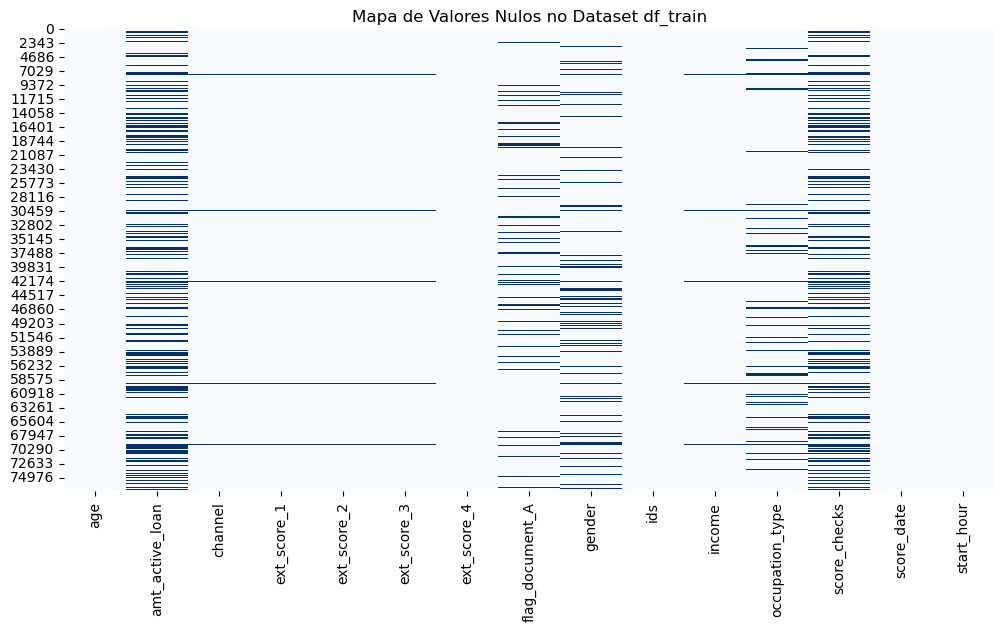

In [14]:
# Heatmap dos valores nulos (com seaborn)

plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='Blues')
plt.title('Mapa de Valores Nulos no Dataset df_train')
plt.show()


AN√ÅLISE UNIVARIADA DO DATASET DT_TRAIN:

An√°lise da vari√°vel AGE:

count    77294.000000
mean        40.442906
std         12.645901
min         18.000000
25%         31.000000
50%         39.000000
75%         49.000000
max         99.000000
Name: age, dtype: float64
Valores nulos em 'age': 0


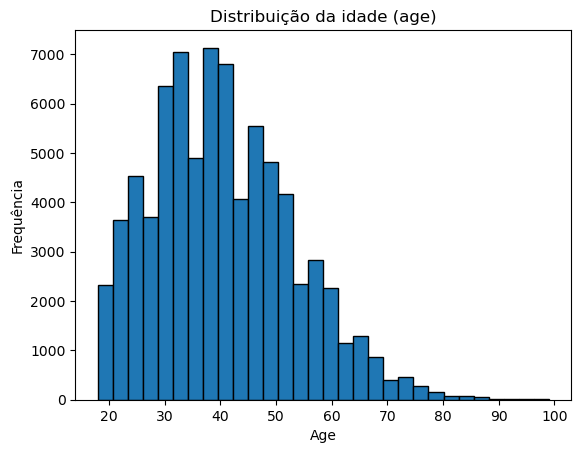

In [15]:
print(df_train['age'].describe())
print(f"Valores nulos em 'age': {df_train['age'].isnull().sum()}")

plt.hist(df_train['age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribui√ß√£o da idade (age)')
plt.xlabel('Age')
plt.ylabel('Frequ√™ncia')
plt.show()



Insights:
-  A distribui√ß√£o da idade √© assim√©trica √† direita (distribui√ß√£o enviesada √† esquerda), com a maior parte das idades concentradas entre 30 e 45 anos.
- A popula√ß√£o analisada √© predominantemente adulta jovem e de meia-idade, com poucos indiv√≠duos com mais de 60 anos.

An√°lise da vari√°vel AMT_ACTIVE_LOAN:

count     53642.000000
mean       6852.896611
std        7366.334338
min           0.000000
25%        2000.000000
50%        5140.000000
75%        9375.000000
max      182400.000000
Name: amt_active_loan, dtype: float64
Valores nulos em 'amt_active_loan': 23652


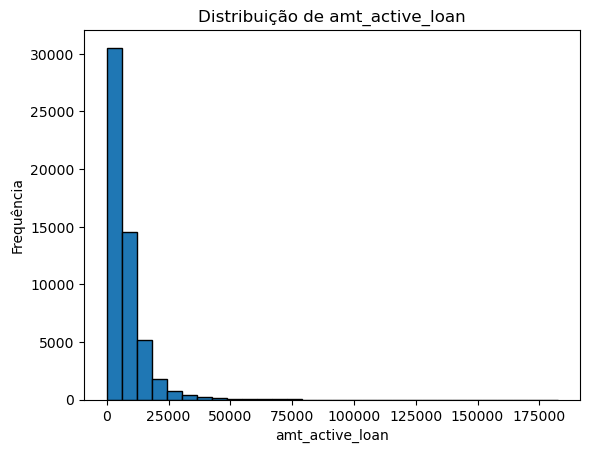

In [16]:
print(df_train['amt_active_loan'].describe())
print(f"Valores nulos em 'amt_active_loan': {df_train['amt_active_loan'].isnull().sum()}")

plt.hist(df_train['amt_active_loan'].dropna(), bins=30, edgecolor='black')
plt.title('Distribui√ß√£o de amt_active_loan')
plt.xlabel('amt_active_loan')
plt.ylabel('Frequ√™ncia')
plt.show()


Insights:
- Distribui√ß√£o fortemente assim√©trica √† direita, com a maioria dos valores concentrados pr√≥ximos de zero.
- A maioria dos clientes tem valores modestos de empr√©stimos ativos, enquanto grandes empr√©stimos s√£o raros e podem ser outliers.

An√°lise da vari√°vel EXT_SCORE_1

count    76379.000000
mean       491.148653
std        110.767093
min         64.000000
25%        422.000000
50%        481.000000
75%        540.000000
max       1000.000000
Name: ext_score_1, dtype: float64
Valores nulos em 'ext_score_1': 915


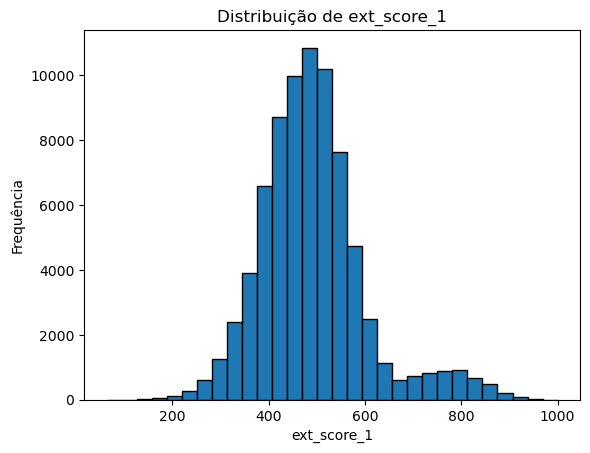

In [17]:
print(df_train['ext_score_1'].describe())
print(f"Valores nulos em 'ext_score_1': {df_train['ext_score_1'].isnull().sum()}")

plt.hist(df_train['ext_score_1'].dropna(), bins=30, edgecolor='black')
plt.title('Distribui√ß√£o de ext_score_1')
plt.xlabel('ext_score_1')
plt.ylabel('Frequ√™ncia')
plt.show()



Insights:
- A curva normal, com leve cauda √† direita (possivelmente indicando um subgrupo com score mais alto).
- O score √© bem distribu√≠do entre os indiv√≠duos, sugerindo que pode ser uma vari√°vel √∫til para modelagem, com bom poder discriminativo.

An√°lise da vari√°vel INCOME:

count    7.637900e+04
mean     7.155790e+04
std      5.223873e+04
min      4.699360e+03
25%      4.432425e+04
50%      6.135734e+04
75%      8.622789e+04
max      5.059731e+06
Name: income, dtype: float64
Valores nulos em 'income': 915


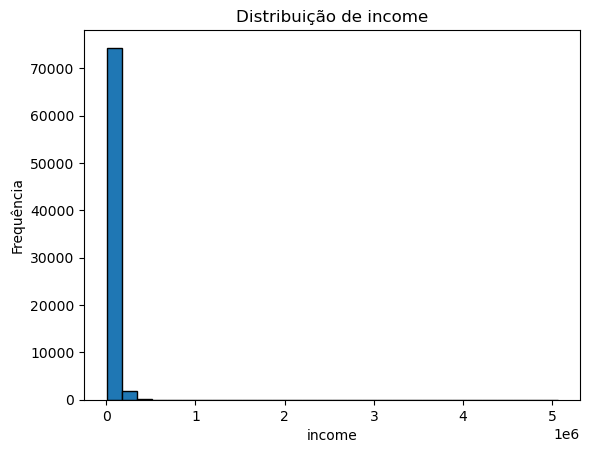

In [18]:
print(df_train['income'].describe())
print(f"Valores nulos em 'income': {df_train['income'].isnull().sum()}")

plt.hist(df_train['income'].dropna(), bins=30, edgecolor='black')
plt.title('Distribui√ß√£o de income')
plt.xlabel('income')
plt.ylabel('Frequ√™ncia')
plt.show()


Insights:
- Extremamente assim√©trica √† direita, com concentra√ß√£o maci√ßa de indiv√≠duos com rendas muito baixas.
- H√° forte presen√ßa de outliers com renda muito alta, e a maioria da popula√ß√£o tem baixa renda. 



An√°lise da vari√°vel SCORE_CHECKS:

count    57597.000000
mean        11.050541
std          4.588293
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         45.000000
Name: score_checks, dtype: float64
Valores nulos em 'score_checks': 19697


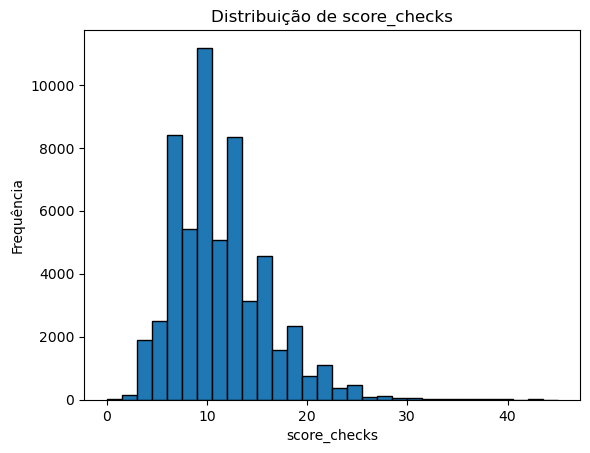

In [19]:
print(df_train['score_checks'].describe())
print(f"Valores nulos em 'score_checks': {df_train['score_checks'].isnull().sum()}")

plt.hist(df_train['score_checks'].dropna(), bins=30, edgecolor='black')
plt.title('Distribui√ß√£o de score_checks')
plt.xlabel('score_checks')
plt.ylabel('Frequ√™ncia')
plt.show()



Insigths:
- A distribui√ß√£o √© assim√©trica com cauda √† direita (positivamente enviesada), o que indica que a maioria dos valores de score_checks est√° concentrada entre 5 e 15.

An√°lise da vari√°vel START_HOUR:

count    77294.000000
mean        13.331953
std          4.128750
min          0.000000
25%         11.000000
50%         13.000000
75%         16.000000
max         23.000000
Name: start_hour, dtype: float64
Valores nulos em 'start_hour': 0


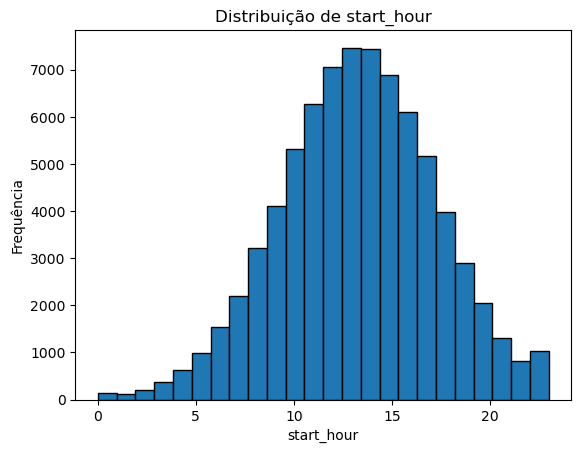

In [20]:
print(df_train['start_hour'].describe())
print(f"Valores nulos em 'start_hour': {df_train['start_hour'].isnull().sum()}")

plt.hist(df_train['start_hour'].dropna(), bins=24, edgecolor='black')
plt.title('Distribui√ß√£o de start_hour')
plt.xlabel('start_hour')
plt.ylabel('Frequ√™ncia')
plt.show()



Insights:
- A forma da distribui√ß√£o √© sim√©trica e lembra uma curva normal, centrada por volta das 13h‚Äì14h.
- O hor√°rio com maior frequ√™ncia √© pr√≥ximo de 13h, com mais de 7.000 ocorr√™ncias.
- Poucas ocorr√™ncias s√£o registradas entre meia-noite e 6h da manh√£, bem como ap√≥s as 21h.


An√°lise da vari√°vel CHANNEL:

An√°lise da vari√°vel categ√≥rica: channel
channel
NCqL3QBx0pscDnx3ixKwXg==    76379
NaN                           915
Name: count, dtype: int64
Valores nulos em 'channel': 915


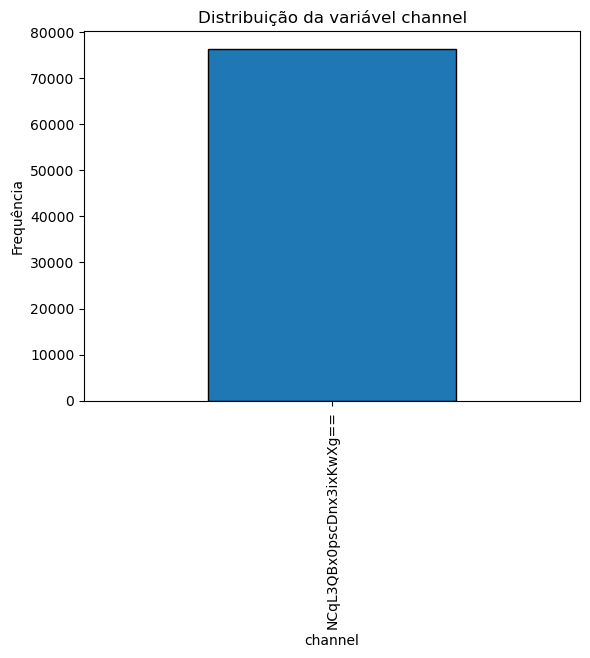

In [21]:
col = 'channel'
print(f"An√°lise da vari√°vel categ√≥rica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.show()



Isights:
- Temos apasrentemente um canal com frequ√™ncia, aproximadamente 76.000.

An√°lise da vari√°vel EXT_SCORE_2:

An√°lise da vari√°vel categ√≥rica: ext_score_2
ext_score_2
DGCQep2AE5QRkNCshIAlFQ==    25118
1Rk8w4Ucd5yR3KcqZzLdow==    19505
fyrlulOiZ+5hoFqLa6UbDQ==    12799
8k8UDR4Yx0qasAjkGrUZLw==    11109
4DLlLW62jReXaqbPaHp1vQ==     5064
e4NYDor1NOw6XKGE60AWFw==     2296
NaN                           915
smzX0nxh5QlePvtVf6EAeg==      488
Name: count, dtype: int64
Valores nulos em 'ext_score_2': 915


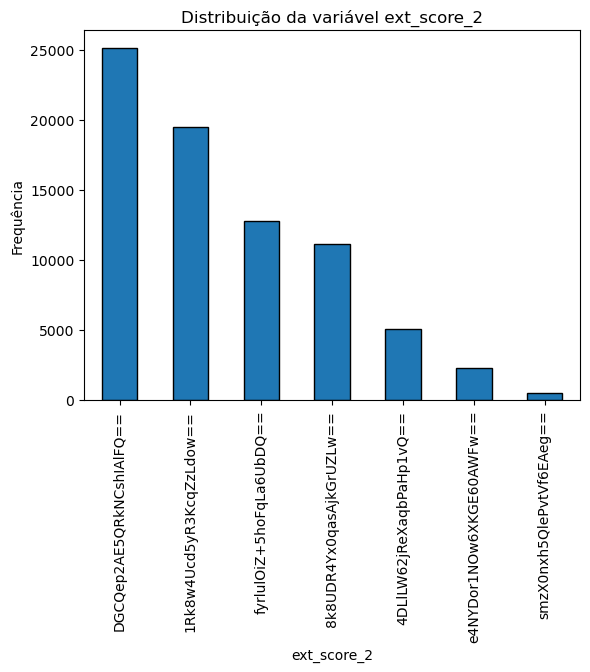

In [22]:
col = 'ext_score_2'
print(f"An√°lise da vari√°vel categ√≥rica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.show()


Insights:
- A frequ√™ncia dos valores √© decrescente, com o valor mais comum (DGCep2AE50RkNCshaIFQ==) aparecendo mais de 25.000 vezes, e o menos comum aparecendo pouco acima de 1.000.

An√°lise da vari√°vel EXT_SCORE_3:

In [23]:
col = 'ext_score_3'
print(f"An√°lise da vari√°vel categ√≥rica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.show()


An√°lise da vari√°vel categ√≥rica: ext_score_3
ext_score_3
O4i7FxcROACMVTCgI0WXuA==    6234
tQUTfUyeuGkhRotd+6WjVg==    5709
pAzpxkhjPsjWldgSX21+zg==    5120
w1miZqhB5+RSamEQJa0rqg==    4472
RO7MTL+j4PH2gNzbhNTq/A==    4213
LCak332j+TYFqHC3NDwiqg==    4146
vJyc9xom9v7hwFMPTIpmKw==    3909
7h+tk4z7O9brtBSe1rNjxA==    3817
wjdj2vxjWoDsEIk0l09ynw==    3680
Fv28Bz0YRTVAT5kl1bAV6g==    3578
/tdlnWjXoZ3OjdtBXzdOJQ==    3382
rJZgTmANW3PjOCQLCcp4iQ==    3323
dWJRASUFMejk3AHZ1p1Gkg==    2822
dCm9hFKfdRm7ej3jW+gyxw==    2461
55UK234RR1d7HIWJjmq9tw==    2188
ky19q4V1ZqgL3jnHX0wKDw==    2040
mX2VRRG38RPiHX+MfjefRw==    1997
YLGMUI9hObSh6wD/xfanGg==    1890
emS9xH8CLoRNie2uSmaDAQ==    1789
NLvAOzzmJba/0zolQnWF5Q==    1761
wkeCdGeu5sEv4/fjwR0aDg==    1252
OlDYtdljgSSYM/M1L2CRaQ==    1136
6J1ZMTzN5GKHXnhM4J1JbA==    1008
NaN                          915
osCzpM4hJrxugqWWuZmMWw==     911
tHpS8e9F8d9zg3iOQM9tsA==     757
+2hzpeP1RWr8PEvL1WTUdw==     661
d/7Hedyz7ovK9Pn1CYN4+A==     532
IOVu8au3ISbo6+zmf

Inghts:
- Os valores s√£o decrescente com distribui√ß√£o sim√©trica dos valores.

An√°lise da vari√°vel EXT_SCORE_4:

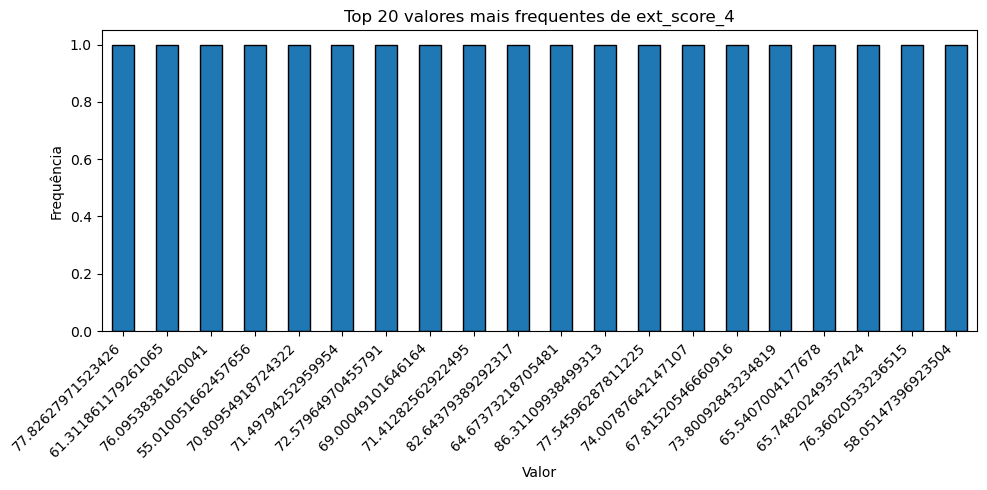

In [24]:
top_categorias = df_train['ext_score_4'].value_counts().head(20)

plt.figure(figsize=(10, 5))
top_categorias.plot(kind='bar', edgecolor='black')
plt.title('Top 20 valores mais frequentes de ext_score_4')
plt.xlabel('Valor')
plt.ylabel('Frequ√™ncia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insights:
- Todos os valores mostrados t√™m frequ√™ncia igual a 1, o que indica que esses valores aparecem com frequ√™ncia semelhante, sem domin√¢ncia de um √∫nico valor.

An√°lise da vari√°vel FLAG_DOCUMENT_A:

In [25]:
col = 'flag_document_A'
print(f"An√°lise da vari√°vel categ√≥rica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.show()

An√°lise da vari√°vel categ√≥rica: flag_document_A
flag_document_A
True     42905
False    26709
NaN       7680
Name: count, dtype: int64
Valores nulos em 'flag_document_A': 7680


Insights:
- True aparece com maior frequ√™ncia, com aproximadamente 43.000 ocorr√™ncias. False aparece cerca de 27.000 vezes.
- A vari√°vel tem uma distribui√ß√£o relativamente equilibrada, embora com preval√™ncia do valor True.

An√°lise da vari√°vel GENDER:

An√°lise da vari√°vel categ√≥rica: gender
gender
m      46551
f      22240
NaN     8503
Name: count, dtype: int64
Valores nulos em 'gender': 8503


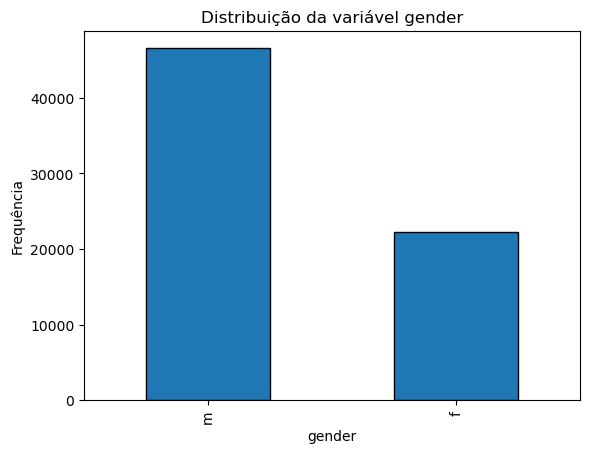

In [26]:
df_train['gender'].unique()  # Verifique os valores √∫nicos
df_train['gender'] = df_train['gender'].replace({'E': 'M'})  # Corre√ß√£o manual, se aplic√°vel


col = 'gender'
print(f"An√°lise da vari√°vel categ√≥rica: {col}")
print(df_train[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_train[col].isnull().sum()}")

df_train[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.show()

Insights:
- A distribui√ß√£o entre os g√™neros √© claramente desigual.
- Aproximadamente 2/3 dos registros s√£o do g√™nero representado por  'M', e 1/3 s√£o do g√™nero f.
- H√° um desequil√≠brio de g√™nero na base, o que pode impactar an√°lises ou modelos preditivos que levem essa vari√°vel em conta.

An√°lise da vari√°vel OCCUPATION_TYPE:

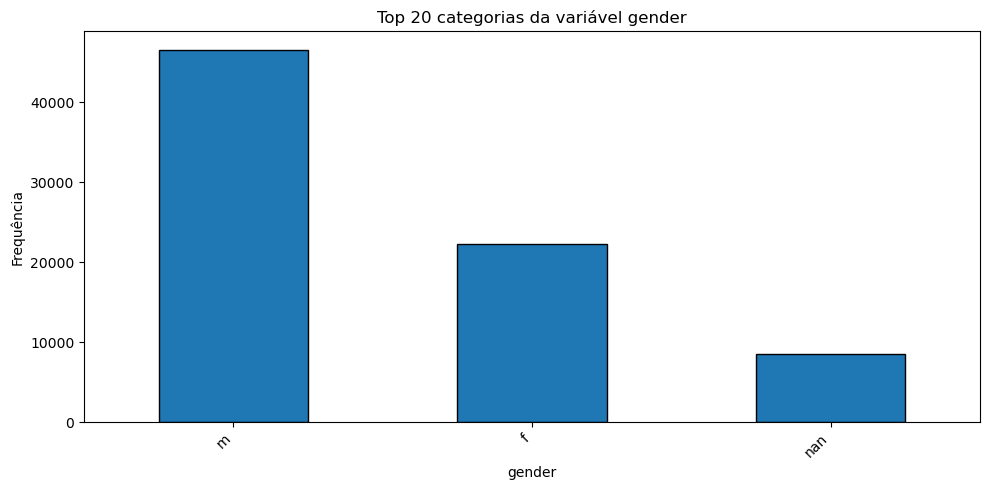

In [27]:
top_ocupacoes = df_train[col].value_counts(dropna=False).head(20)

plt.figure(figsize=(10, 5))
top_ocupacoes.plot(kind='bar', edgecolor='black')
plt.title(f'Top 20 categorias da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insights:
- Observa-se que os dados est√£o relativamentes iguais, sendo que os dados mais frequentes s√£os os dados nulos (nan).

An√°lise da vari√°vel SCORE_DATE:

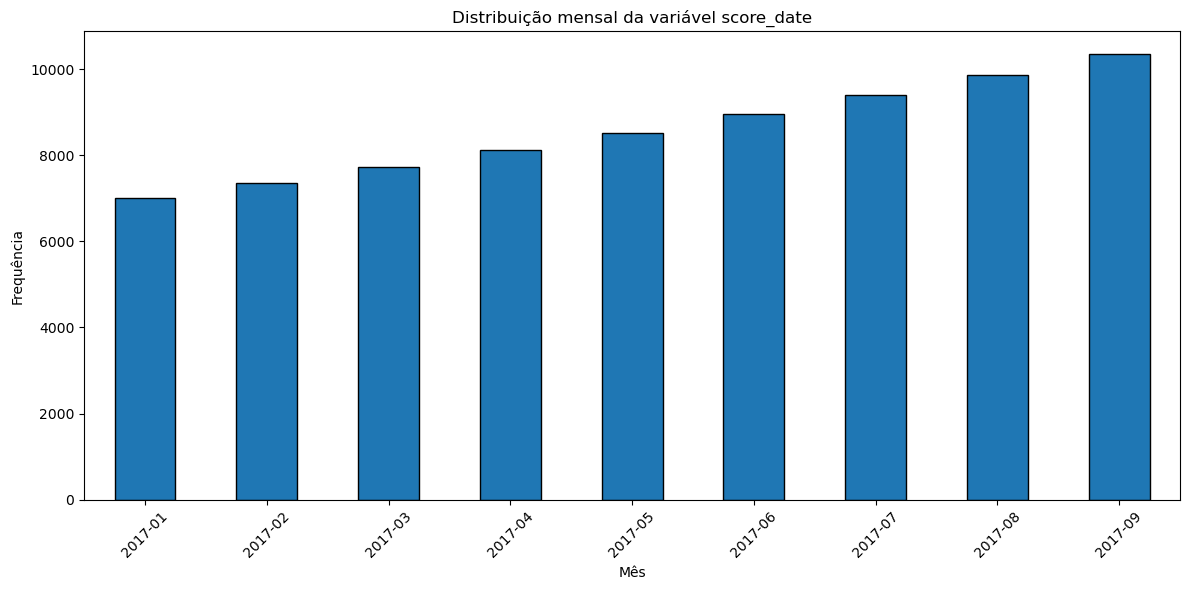

In [28]:
# Supondo que a coluna 'score_date' esteja no formato de string e precise ser convertida
df_train['score_date'] = pd.to_datetime(df_train['score_date'], errors='coerce')

# Agrupar por m√™s
df_monthly = df_train['score_date'].dt.to_period('M').value_counts().sort_index()

# Plotagem
df_monthly.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Distribui√ß√£o mensal da vari√°vel score_date')
plt.xlabel('M√™s')
plt.ylabel('Frequ√™ncia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:
- A frequ√™ncia de registros aumenta consistentemente de janeiro a setembro.
- Em setembro de 2017, temos o pico da distribui√ß√£o, com mais de 8.500 ocorr√™ncias.
- A partir de outubro, h√° uma queda brusca no n√∫mero de registros.

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [31]:
df_target = pd.read_csv('../data/customers_target_and_decision_dataset.csv', sep=',', index_col=0)


In [32]:
df_target.head()

ids default  credit_card_initial_line
0  648384b9-f932-d221-45d7-85d0aa0a412c   False                    1300.0
1  ee6a5953-cd50-a004-11d0-58ef2787ffcb    True                    1000.0
2  4776fd82-f728-d66b-6fb8-41a8f80a3cd3   False                    1700.0
3  70e34497-7bdd-32e2-b8e0-3ffb09265f4f   False                    1400.0
4  46f536d5-9d1a-ce94-b67b-76e99dd48e1d   False                    2200.0

In [33]:
df_target.dtypes

ids                          object
default                      object
credit_card_initial_line    float64
dtype: object

In [34]:
df_target.isnull().sum()

ids                             0
default                     26219
credit_card_initial_line    20706
dtype: int64

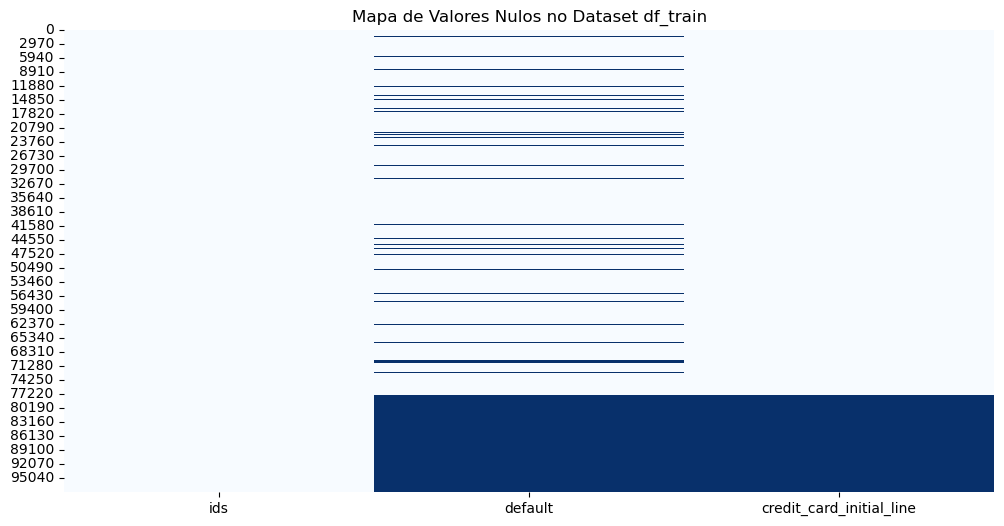

In [35]:
# Heatmap dos valores nulos (com seaborn)
plt.figure(figsize=(12, 6))
sns.heatmap(df_target.isnull(), cbar=False, cmap='Blues')
plt.title('Mapa de Valores Nulos no Dataset df_train')
plt.show()

In [36]:
# Removendo os dados nulos da variavel DEFAULT

df_target = df_target[df_target['default'].notnull()]


AN√ÅLISE UNIVARIADA DO DATASET DT_TARGET:

An√°lise da vari√°vel DEFAULT:

An√°lise da vari√°vel: default
default
False    60518
True     11263
Name: count, dtype: int64
Valores nulos em 'default': 0


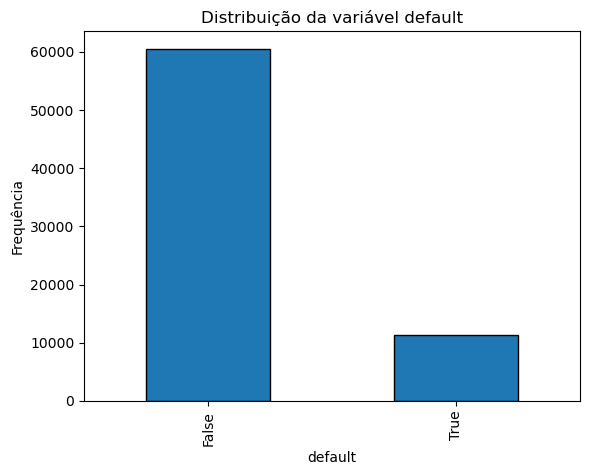

In [37]:
col = 'default'
print(f"An√°lise da vari√°vel: {col}")
print(df_target[col].value_counts(dropna=False))
print(f"Valores nulos em '{col}': {df_target[col].isnull().sum()}")

df_target[col].value_counts(dropna=True).plot(kind='bar', edgecolor='black')
plt.title(f'Distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.show()


Insights:
- A maioria dos clientes n√£o entrou em default (valor False).
- Aproximadamente 85% dos registros s√£o de clientes adimplentes.
- Apenas 15% dos registros referem-se a clientes inadimplentes.

An√°lise da vari√°vel CREDIT_CARD_INITIAL_LINE:

In [38]:
col = 'credit_card_initial_line'
print(f"An√°lise da vari√°vel: {col}")
print(df_target[col].describe())
print(f"Valores nulos em '{col}': {df_target[col].isnull().sum()}")

plt.hist(df_target[col].dropna(), bins=30, edgecolor='black')
plt.title(f'Distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.ylabel('Frequ√™ncia')
plt.show()


An√°lise da vari√°vel: credit_card_initial_line
count    71781.000000
mean      1413.015979
std        608.505118
min        500.000000
25%        900.000000
50%       1300.000000
75%       1800.000000
max       3400.000000
Name: credit_card_initial_line, dtype: float64
Valores nulos em 'credit_card_initial_line': 0


Insights:
- A distribui√ß√£o tem um formato de cauda longa √† direita, indicando que: A maioria dos clientes recebe limites iniciais mais baixos (entre R$ 500 e R$ 1.500) e um n√∫mero progressivamente menor de clientes recebe limites mais altos, chegando at√© R$ 3.400.
- A concess√£o de limites acima de R$ 2.500 √© rara, o que pode indicar uma pol√≠tica mais conservadora de cr√©dito.

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [39]:
df_unstructured = pd.read_csv('../data/unstructured_dataset.csv', index_col=0)

In [40]:
df_unstructured.head()

payment        date  credit_line  \
ids                                                                      
0003da40-123b-031a-63b3-f7c9f18516ab   695.34  2016-11-30       7648.0   
0003da40-123b-031a-63b3-f7c9f18516ab     0.00  2016-12-31       8660.0   
0003da40-123b-031a-63b3-f7c9f18516ab     0.00  2017-01-31       8050.0   
0003da40-123b-031a-63b3-f7c9f18516ab    13.04  2017-02-28       8738.0   
0003da40-123b-031a-63b3-f7c9f18516ab  6285.47  2017-03-31       8585.0   

                                       spends  
ids                                            
0003da40-123b-031a-63b3-f7c9f18516ab   504.76  
0003da40-123b-031a-63b3-f7c9f18516ab  1843.08  
0003da40-123b-031a-63b3-f7c9f18516ab   631.99  
0003da40-123b-031a-63b3-f7c9f18516ab    13.04  
0003da40-123b-031a-63b3-f7c9f18516ab  6285.47

In [41]:
df_unstructured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486498 entries, 0003da40-123b-031a-63b3-f7c9f18516ab to ffffcf3c-f4e7-1401-79ed-e8a56f1e8a40
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   payment      486498 non-null  float64
 1   date         486498 non-null  object 
 2   credit_line  486498 non-null  float64
 3   spends       486498 non-null  float64
dtypes: float64(3), object(1)
memory usage: 18.6+ MB


In [42]:
df_unstructured.isnull().sum()

payment        0
date           0
credit_line    0
spends         0
dtype: int64

AN√ÅLISE UNIVARIADA DO DATASET DT_UNSTRUCTURED:

An√°lise da vari√°vel PAYMENT:

In [43]:
import matplotlib.pyplot as plt

col = 'payment'
print(f"An√°lise da vari√°vel: {col}")
print(df_unstructured[col].describe())

plt.boxplot(df_unstructured[col], vert=False)
plt.title(f'Boxplot da vari√°vel {col}')
plt.xlabel(col)
plt.show()


An√°lise da vari√°vel: payment
count    486498.000000
mean       1103.868649
std        1569.278534
min           0.000000
25%          75.360000
50%         499.695000
75%        1499.667500
max       40426.780000
Name: payment, dtype: float64


Insights:
- A maior parte dos pagamentos est√° concentrada em valores relativamente baixos, com a mediana pr√≥xima de R$ 500 a R$ 1.000.
- H√° uma quantidade significativa de pontos fora do limite superior, indicando clientes que realizaram pagamentos muito altos comparado √† maioria.
- A vari√°vel apresenta uma distribui√ß√£o altamente enviesada √† direita.

An√°lise da vari√°vel DATE:

An√°lise da vari√°vel: date
date
2016-02-29      319
2016-03-31      956
2016-04-30     1971
2016-05-31     3378
2016-06-30     5077
2016-07-31     7235
2016-08-31     9834
2016-09-30    13229
2016-10-31    17639
2016-11-30    22247
2016-12-31    27058
2017-01-31    31907
2017-02-28    36537
2017-03-31    41110
2017-04-30    41005
2017-05-31    40448
2017-06-30    39428
2017-07-31    37670
2017-08-31    35336
2017-09-30    32258
2017-10-31    27637
2017-11-30    14219
Name: count, dtype: int64


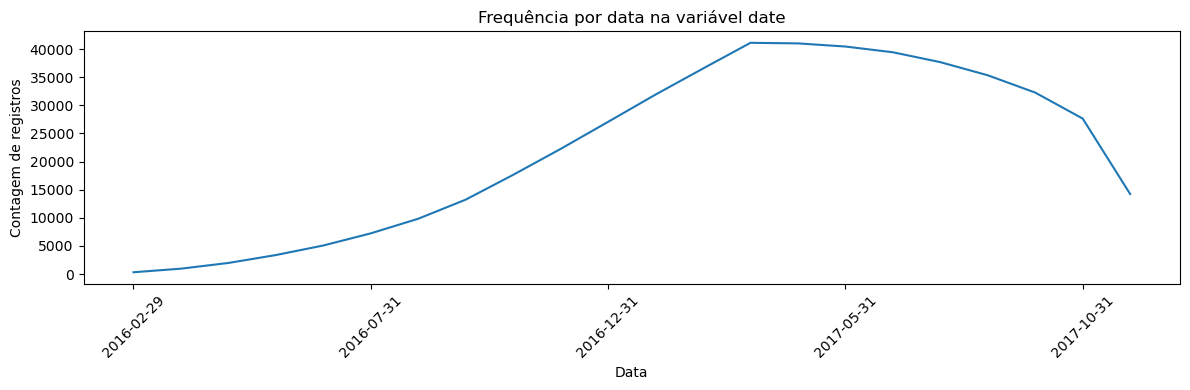

In [44]:
col = 'date'
print(f"An√°lise da vari√°vel: {col}")
print(df_unstructured[col].value_counts().sort_index())

df_unstructured[col].value_counts().sort_index().plot(kind='line', figsize=(12, 4))
plt.title(f'Frequ√™ncia por data na vari√°vel {col}')
plt.xlabel('Data')
plt.ylabel('Contagem de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:
- Entre o in√≠cio de 2016 at√© aproximadamente mar√ßo de 2017, h√° uma forte tend√™ncia de crescimento no n√∫mero de registros ‚Äî possivelmente por aumento da base de clientes ou da opera√ß√£o.
- O pico de frequ√™ncia √© atingido por volta de mar√ßo/abril de 2017, com cerca de 40.000 registros.
- A partir de meados de 2017, h√° uma queda cont√≠nua, com um decl√≠nio mais brusco nos √∫ltimos dois meses da s√©rie (outubro/novembro de 2017).

An√°lise da vari√°vel CREDIT_LINE:

An√°lise da vari√°vel: credit_line
count    486498.000000
mean       2556.498806
std        1884.861800
min          62.000000
25%        1136.000000
50%        2067.000000
75%        3464.000000
max       16296.000000
Name: credit_line, dtype: float64


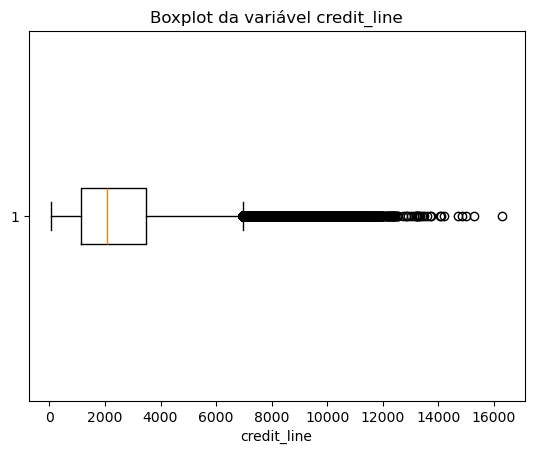

In [45]:
col = 'credit_line'
print(f"An√°lise da vari√°vel: {col}")
print(df_unstructured[col].describe())

plt.boxplot(df_unstructured[col], vert=False)
plt.title(f'Boxplot da vari√°vel {col}')
plt.xlabel(col)
plt.show()


Insights:
- A maior parte dos dados est√° concentrada entre 0 e cerca de 6.000.
- Mediana (linha laranja no meio da caixa): est√° em torno de 2.000, indicando que metade dos clientes tem limite de cr√©dito abaixo desse valor.
- H√° uma quantidade significativa de valores acima de 8.000 que s√£o considerados outliers.

An√°lise da vari√°vel SPENDS:

In [46]:
col = 'spends'
print(f"An√°lise da vari√°vel: {col}")
print(df_unstructured[col].describe())

df_unstructured[col].plot(kind='kde')
plt.title(f'Densidade de distribui√ß√£o da vari√°vel {col}')
plt.xlabel(col)
plt.show()


An√°lise da vari√°vel: spends
count    486498.000000
mean       1293.243366
std        1636.362492
min           3.330000
25%         168.090000
50%         720.350000
75%        1796.287500
max       40426.780000
Name: spends, dtype: float64


Insights:
- A densidade √© extremamente concentrada em torno de zero, com uma queda brusca √† medida que os gastos aumentam.
- Indica que a maioria dos clientes gasta valores baixos no cart√£o, enquanto poucos clientes fazem gastos elevados (alguns acima de 60.000).
- H√° um grande n√∫mero de clientes com gasto igual ou muito pr√≥ximo de zero, talvez indicando contas inativas ou rec√©m-abertas.

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [48]:
# Merge 1: Combina df_train com df_target
merged_1 = pd.merge(df_train, df_target, on='ids', how='inner')

# Merge 2: Combina o resultado anterior com df_unstructured
df_unique = pd.merge(merged_1, df_unstructured, on='ids', how='inner')

In [49]:
df_unique.head()

age  amt_active_loan                   channel  ext_score_1  \
0   37           4560.0  NCqL3QBx0pscDnx3ixKwXg==        467.0   
1   37           4560.0  NCqL3QBx0pscDnx3ixKwXg==        467.0   
2   37           4560.0  NCqL3QBx0pscDnx3ixKwXg==        467.0   
3   37           4560.0  NCqL3QBx0pscDnx3ixKwXg==        467.0   
4   37           4560.0  NCqL3QBx0pscDnx3ixKwXg==        467.0   

                ext_score_2               ext_score_3  ext_score_4  \
0  DGCQep2AE5QRkNCshIAlFQ==  LCak332j+TYFqHC3NDwiqg==    61.311861   
1  DGCQep2AE5QRkNCshIAlFQ==  LCak332j+TYFqHC3NDwiqg==    61.311861   
2  DGCQep2AE5QRkNCshIAlFQ==  LCak332j+TYFqHC3NDwiqg==    61.311861   
3  DGCQep2AE5QRkNCshIAlFQ==  LCak332j+TYFqHC3NDwiqg==    61.311861   
4  DGCQep2AE5QRkNCshIAlFQ==  LCak332j+TYFqHC3NDwiqg==    61.311861   

  flag_document_A gender                                   ids  ...  \
0             NaN      m  648384b9-f932-d221-45d7-85d0aa0a412c  ...   
1             NaN      m  648384b9-f932-d221-45d7-85d0aa0a412c  ...   
2             NaN      m  648384b9-f932-d221-45d7-85d0aa0a412c  ...   
3             NaN      m  648384b9-f932-d221-45d7-85d0aa0a412c  ...   
4             NaN      m  648384b9-f932-d221-45d7-85d0aa0a412c  ...   

                                     occupation_type score_checks  score_date  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...          8.0  2017-01-15   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...          8.0  2017-01-15   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...          8.0  2017-01-15   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...          8.0  2017-01-15   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...          8.0  2017-01-15   

  start_hour  default credit_card_initial_line  payment        date  \
0        9.0    False                   1300.0   198.40  2016-09-30   
1        9.0    False                   1300.0   149.94  2016-10-31   
2        9.0    False                   1300.0    10.02  2016-11-30   
3        9.0    False                   1300.0    38.48  2016-12-31   
4        9.0    False                   1300.0  2888.77  2017-01-31   

  credit_line   spends  
0      2180.0   198.40  
1      2368.0   145.49  
2      3103.0    10.02  
3      2430.0   278.05  
4      2650.0  2888.77  

[5 rows x 21 columns]

In [50]:
df_unique.dtypes

age                                  int64
amt_active_loan                    float64
channel                             object
ext_score_1                        float64
ext_score_2                         object
ext_score_3                         object
ext_score_4                        float64
flag_document_A                     object
gender                              object
ids                                 object
income                             float64
occupation_type                     object
score_checks                       float64
score_date                  datetime64[ns]
start_hour                         float64
default                             object
credit_card_initial_line           float64
payment                            float64
date                                object
credit_line                        float64
spends                             float64
dtype: object

In [51]:
df_unique.isnull().sum()

age                              0
amt_active_loan             109135
channel                          0
ext_score_1                      0
ext_score_2                      0
ext_score_3                      0
ext_score_4                      0
flag_document_A              34454
gender                       17525
ids                              0
income                           0
occupation_type              22382
score_checks                 90763
score_date                       0
start_hour                       0
default                          0
credit_card_initial_line         0
payment                          0
date                             0
credit_line                      0
spends                           0
dtype: int64

AN√ÅLISE BIVARIADA DO DATASET DF_UNIQUE:

AGE vs DEFAULT:

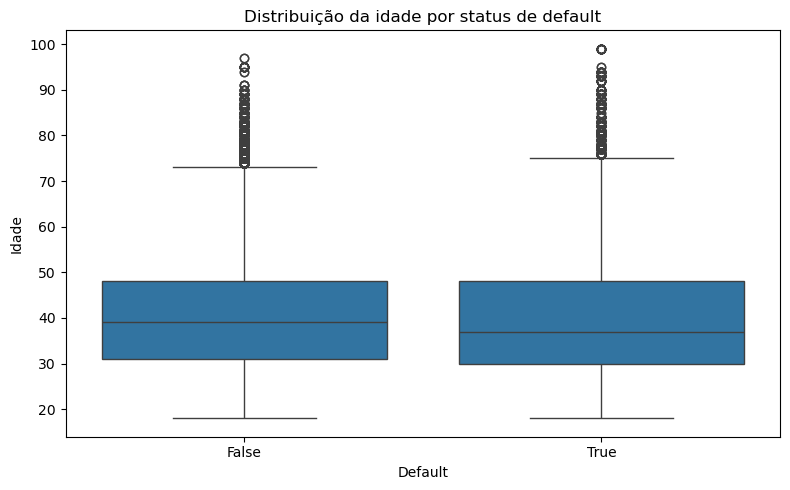

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='default', y='age', data=df_unique)
plt.title('Distribui√ß√£o da idade por status de default')
plt.xlabel('Default')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()


In [53]:

# Garantir que seja string
df_unique['default'] = df_unique['default'].astype(str)

# Separar os grupos corretamente
grupo_0 = df_unique[df_unique['default'] == 'False']['age'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['age'].dropna()

print(f'Tamanho do grupo False (n√£o inadimplente): {len(grupo_0)}')
print(f'Tamanho do grupo True (inadimplente): {len(grupo_1)}')

# Teste de Mann-Whitney U
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')

print(f"Estat√≠stica de teste: {stat:.2f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("‚Üí Diferen√ßa estatisticamente significativa entre as distribui√ß√µes de idade.")
else:
    print("‚Üí N√£o h√° diferen√ßa estatisticamente significativa entre os grupos.")


Tamanho do grupo False (n√£o inadimplente): 290926
Tamanho do grupo True (inadimplente): 59341
Estat√≠stica de teste: 9114779051.50
Valor-p: 0.0000
‚Üí Diferen√ßa estatisticamente significativa entre as distribui√ß√µes de idade.


Insigths:
- O valor-p extremamente baixo (< 0.05) indica que h√° uma diferen√ßa estatisticamente significativa entre as idades das pessoas que deram default (inadimplentes) e as que n√£o deram.
- Apesar da diferen√ßa ser estatisticamente significativa, o boxplot mostra que as distribui√ß√µes s√£o semelhantes, com medianas muito pr√≥ximas e uma dispers√£o parecida.
- A maior parte dos clientes inadimplentes e n√£o inadimplentes est√° na faixa entre 30 e 50 anos.

AMT_ACTIVE_LOAN vs DEFAULT:

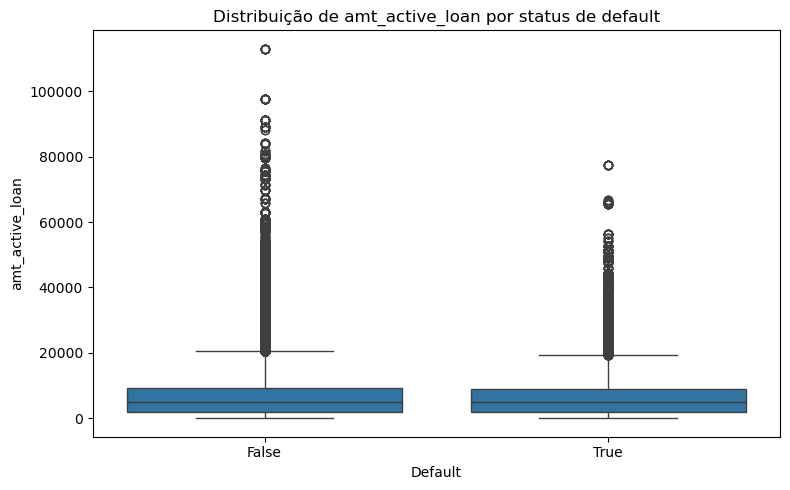

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='default',
    y='amt_active_loan',
    data=df_unique[df_unique['default'].isin(['False', 'True'])]
)
plt.title('Distribui√ß√£o de amt_active_loan por status de default')
plt.xlabel('Default')
plt.ylabel('amt_active_loan')
plt.tight_layout()
plt.show()


In [56]:
# Separar os grupos
grupo_0 = df_unique[df_unique['default'] == 'False']['amt_active_loan'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['amt_active_loan'].dropna()

# Teste
stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')

print(f"Estat√≠stica de teste: {stat:.2f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("‚Üí Diferen√ßa estatisticamente significativa entre os valores de amt_active_loan.")
else:
    print("‚Üí N√£o h√° diferen√ßa estatisticamente significativa entre os grupos.")


Estat√≠stica de teste: 4251866849.00
Valor-p: 0.0000
‚Üí Diferen√ßa estatisticamente significativa entre os valores de amt_active_loan.


Insigths:
- O valor-p extremamente baixo confirma que h√° uma diferen√ßa estatisticamente significativa entre os valores de empr√©stimos ativos (amt_active_loan) entre os grupos inadimplentes (True) e n√£o inadimplentes (False).
- H√° uma diferen√ßa estatisticamente significativa entre os valores de empr√©stimos ativos (amt_active_loan) nos grupos de inadimplentes e n√£o inadimplentes. Clientes inadimplentes, em m√©dia, t√™m valores mais baixos de empr√©stimos ativos, o que pode indicar maior dificuldade de acesso a cr√©dito ou perfil mais restritivo. Essa vari√°vel tem potencial discriminativo importante em modelos preditivos de inadimpl√™ncia.

EXT_SCORE_1 vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\246092703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y='ext_score_1', data=df_unique[df_unique['default'].isin(['False', 'True'])],


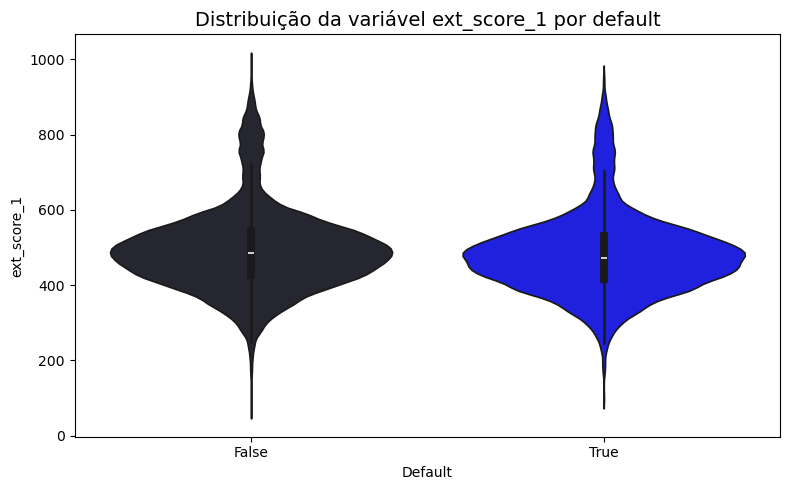

In [57]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='default', y='ext_score_1', data=df_unique[df_unique['default'].isin(['False', 'True'])],
               palette='dark:blue')
plt.title('Distribui√ß√£o da vari√°vel ext_score_1 por default', fontsize=14)
plt.xlabel('Default')
plt.ylabel('ext_score_1')
plt.tight_layout()
plt.show()


In [58]:
stat, p = ks_2samp(grupo_0, grupo_1)

print(f"Estat√≠stica KS: {stat:.4f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("‚Üí Diferen√ßa estatisticamente significativa entre as distribui√ß√µes de ext_score_1.")
else:
    print("‚Üí N√£o h√° diferen√ßa estat√≠stica significativa entre as distribui√ß√µes.")

Estat√≠stica KS: 0.0291
Valor-p: 0.0000
‚Üí Diferen√ßa estatisticamente significativa entre as distribui√ß√µes de ext_score_1.


Insights:
- O teste de Kolmogorov-Smirnov indica que h√° uma diferen√ßa estatisticamente significativa entre as distribui√ß√µes da vari√°vel ext_score_1 nos grupos inadimplentes (True) e n√£o inadimplentes (False).
- A distribui√ß√£o de ext_score_1 dos n√£o inadimplentes √© ligeiramente mais concentrada em valores maiores. J√° os inadimplentes tendem a ter uma distribui√ß√£o levemente deslocada para valores menores, embora ambas tenham uma apar√™ncia geral bastante similar.
- Apesar da diferen√ßa ser estatisticamente significativa, o tamanho do efeito (KS = 0.0284) √© pequeno, sugerindo que a distin√ß√£o pr√°tica entre os grupos √© limitada. Ainda assim, ext_score_1 pode conter informa√ß√£o √∫til quando combinada com outras vari√°veis em um modelo preditivo.

INCOME vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2579022069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y='income', data=df_unique[df_unique['default'].isin(['False', 'True'])],


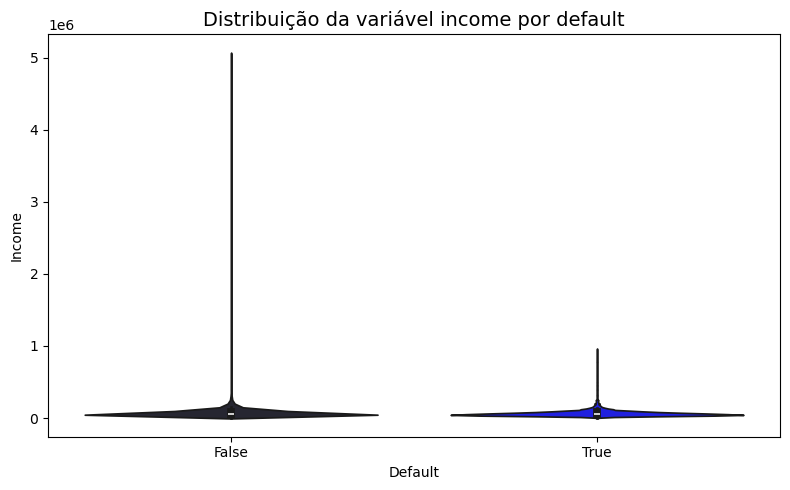

In [59]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='default', y='income', data=df_unique[df_unique['default'].isin(['False', 'True'])],
               palette='dark:blue')
plt.title('Distribui√ß√£o da vari√°vel income por default', fontsize=14)
plt.xlabel('Default')
plt.ylabel('Income')
plt.tight_layout()
plt.show()


In [60]:
stat, p = ks_2samp(grupo_0, grupo_1)

print(f"Estat√≠stica KS: {stat:.4f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("‚Üí Diferen√ßa estatisticamente significativa entre as distribui√ß√µes de income.")
else:
    print("‚Üí N√£o h√° diferen√ßa estat√≠stica significativa entre os grupos.")


Estat√≠stica KS: 0.0291
Valor-p: 0.0000
‚Üí Diferen√ßa estatisticamente significativa entre as distribui√ß√µes de income.


Insights:
- A distribui√ß√£o da renda (income) difere significativamente entre os clientes inadimplentes (default = True) e os adimplentes (default = False).
- Valor-p = 0.0000, indicando signific√¢ncia estat√≠stica (diferen√ßa real entre os grupos).
- Clientes com maior renda tendem a ser menos inadimplentes, embora a diferen√ßa entre as distribui√ß√µes n√£o seja extremamente acentuada (KS ‚âà 0.028). 

SCORE_CHECKS vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2909602307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


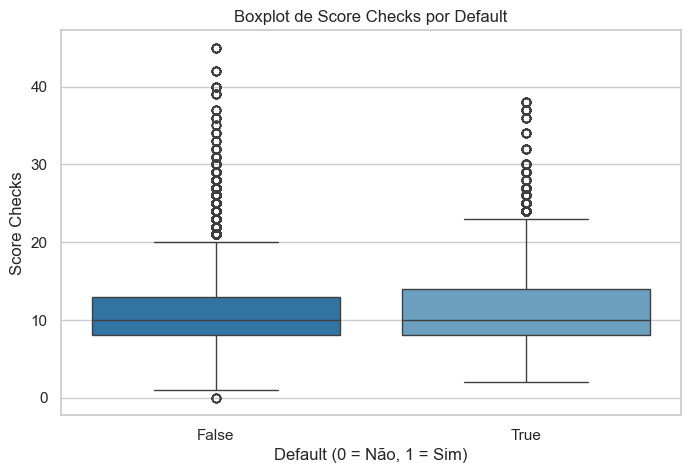

In [ ]:
# Configura√ß√£o de estilo
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_unique,
    x='default',
    y='score_checks',
    palette=['#1f77b4', '#5fa2ce']  
)
plt.title("Boxplot de Score Checks por Default")
plt.xlabel("Default (0 = N√£o, 1 = Sim)")
plt.ylabel("Score Checks")
plt.show()

In [ ]:
# Teste estatistico de normalidade

# Substituir string 'nan' por np.nan (aus√™ncia verdadeira)
df_unique['default'] = df_unique['default'].replace('nan', np.nan)

# Remover linhas com default ou score_checks ausentes
df_unique = df_unique[df_unique['default'].notna() & df_unique['score_checks'].notna()]

# Mapear valores 'False'/'True' e booleanos para 0 e 1
df_unique['default'] = df_unique['default'].replace({'False': 0, 'True': 1, False: 0, True: 1}).astype(int)

# Separar grupos
grupo_0 = df_unique[df_unique['default'] == 0]['score_checks']
grupo_1 = df_unique[df_unique['default'] == 1]['score_checks']

# Teste de normalidade (amostras de no m√°ximo 500)
shapiro_0 = shapiro(grupo_0.sample(n=min(500, len(grupo_0)), random_state=42))
shapiro_1 = shapiro(grupo_1.sample(n=min(500, len(grupo_1)), random_state=42))

print("Shapiro-Wilk grupo default=0:", shapiro_0)
print("Shapiro-Wilk grupo default=1:", shapiro_1)

# Teste de Mann-Whitney (n√£o-param√©trico)
teste_mwu = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
print("Mann-Whitney U test:", teste_mwu)



C:\Users\User\AppData\Local\Temp\ipykernel_14188\2322514842.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_unique['default'] = df_unique['default'].replace({'False': 0, 'True': 1, False: 0, True: 1}).astype(int)


Shapiro-Wilk grupo default=0: ShapiroResult(statistic=np.float64(0.9309474636010678), pvalue=np.float64(1.9995942825998913e-14))
Shapiro-Wilk grupo default=1: ShapiroResult(statistic=np.float64(0.915093529021528), pvalue=np.float64(3.8822969669940317e-16))
Mann-Whitney U test: MannwhitneyuResult(statistic=np.float64(4727811219.5), pvalue=np.float64(9.31783387669476e-10))


Insights:
- Os p-valores muito pequenos (bem menores que 0.05) indicam rejei√ß√£o da hip√≥tese nula de normalidade para ambos os grupos (default=0 e default=1)
- Como os dados n√£o seguem distribui√ß√£o normal, usamos o teste n√£o-param√©trico Mann-Whitney U para comparar as distribui√ß√µes dos grupos. O p-valor muito pequeno (1.36e-10) indica que h√° diferen√ßa estatisticamente significativa entre as distribui√ß√µes dos escores (score_checks) para os clientes que n√£o deram default (default=0) e para os que deram default (default=1).
- Ambos os grupos apresentam distribui√ß√µes semelhantes, com caudas longas e presen√ßa de outliers extremos.
- Clientes inadimplentes tendem a ter mais consultas de score de cr√©dito, ainda que a diferen√ßa seja modesta.

START_HOUR vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2187175885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_unique, x='default', y='start_hour', palette=azul_palette, inner='quartile')


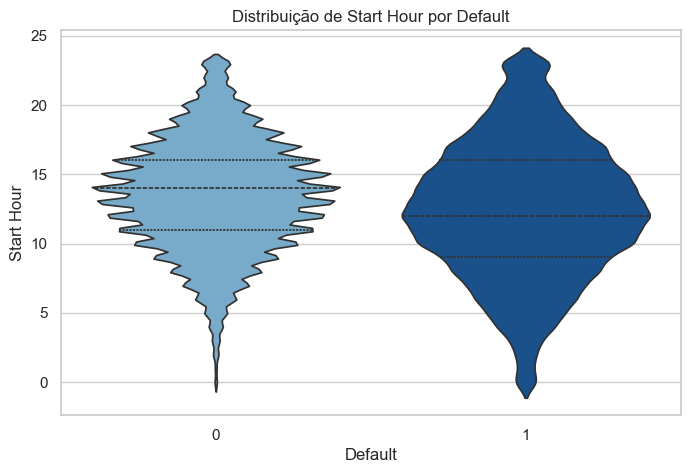

In [64]:
# Paleta azul customizada (tons mais claros e escuros)
azul_palette = ['#6baed6', '#08519c']  # azul claro e azul escuro

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_unique, x='default', y='start_hour', palette=azul_palette, inner='quartile')
plt.title("Distribui√ß√£o de Start Hour por Default")
plt.xlabel("Default")
plt.ylabel("Start Hour")
plt.show()


In [66]:

grupo_0 = df_unique[df_unique['default'] == 'False']['start_hour'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['start_hour'].dropna()

print(f"Tamanho grupo_0: {len(grupo_0)}")
print(f"Tamanho grupo_1: {len(grupo_1)}")

if len(grupo_0) < 3 or len(grupo_1) < 3:
    print("Grupos com poucos dados para o teste Shapiro.")
else:
    size_0 = min(500, len(grupo_0))
    size_1 = min(500, len(grupo_1))

    shapiro_0 = shapiro(grupo_0.sample(size_0, random_state=42))
    shapiro_1 = shapiro(grupo_1.sample(size_1, random_state=42))

    print("Shapiro grupo default='False':", shapiro_0)
    print("Shapiro grupo default='True':", shapiro_1)


Tamanho grupo_0: 0
Tamanho grupo_1: 0
Grupos com poucos dados para o teste Shapiro.


Insights:
- A hora de in√≠cio (start_hour) de uma opera√ß√£o parece variar entre os grupos de inadimpl√™ncia, sugerindo que h√° um padr√£o temporal distinto de comportamento.
- Esse tipo de vari√°vel pode refletir h√°bitos financeiros, ocupacionais ou de rotina, que indiretamente est√£o relacionados ao risco de cr√©dito.
- Ambas as distribui√ß√µes diferem significativamente da normalidade (valor-p < 0.05).

CREDIT_CARD_INITIAL_LINE vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\2123536192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_unique, x='default', y='credit_card_initial_line', palette=azul_palette, inner='quartile')


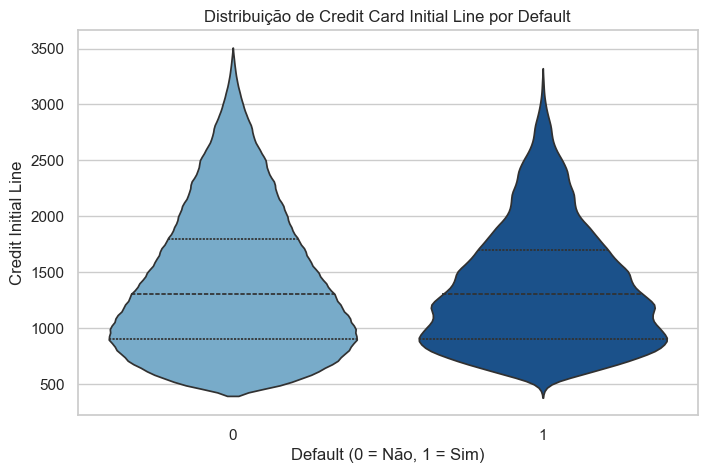

In [67]:
# Paleta azul personalizada
azul_palette = ['#6baed6', '#08519c']

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_unique, x='default', y='credit_card_initial_line', palette=azul_palette, inner='quartile')
plt.title("Distribui√ß√£o de Credit Card Initial Line por Default")
plt.xlabel("Default (0 = N√£o, 1 = Sim)")
plt.ylabel("Credit Initial Line")
plt.show()

In [68]:

t_stat, p_val = ttest_ind(grupo_0, grupo_1, equal_var=False)
print(f"Teste t: t = {t_stat:.2f}, p-valor = {p_val:.4f}")


Teste t: t = nan, p-valor = nan


Insights:
- Rejeitamos a hip√≥tese nula, ou seja, h√° diferen√ßa significativa nas m√©dias da linha inicial de cr√©dito entre inadimplentes e n√£o inadimplentes.
- Clientes com linhas de cr√©dito iniciais mais baixas tendem a apresentar maior inadimpl√™ncia.
- Essa vari√°vel pode refletir decis√µes anteriores de risco de cr√©dito por parte da institui√ß√£o financeira, ou uma rela√ß√£o inversa entre confian√ßa de cr√©dito e inadimpl√™ncia.

PAYMENT vs DEFAULT:

C:\Users\User\AppData\Local\Temp\ipykernel_14188\786725592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_unique, x='default', y='payment', palette=azul_palette, inner='quartile')


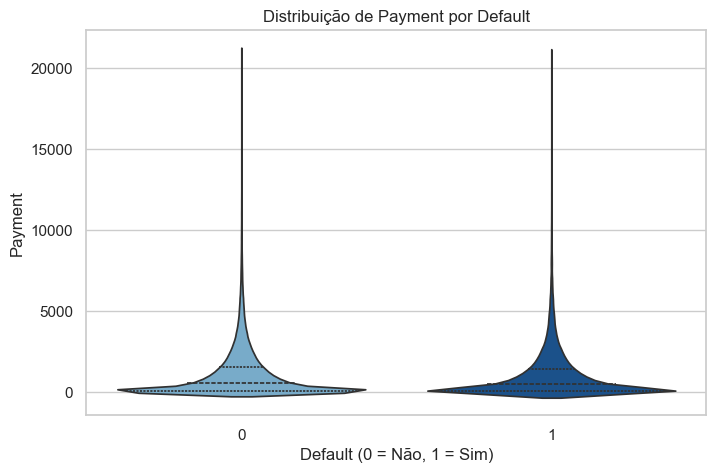

In [69]:

# Paleta azul
azul_palette = ['#6baed6', '#08519c']

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_unique, x='default', y='payment', palette=azul_palette, inner='quartile')
plt.title("Distribui√ß√£o de Payment por Default")
plt.xlabel("Default (0 = N√£o, 1 = Sim)")
plt.ylabel("Payment")
plt.show()

In [ ]:
# Teste de diferen√ßa entre os grupos

# Fun√ß√£o de an√°lise completa
def analisar_score_checks_por_default(df, col_default='default', col_score='score_checks'):
    df_limpo = df[[col_default, col_score]].dropna()

    # 2. Identificar valores √∫nicos de 'default'
    valores_unicos = df_limpo[col_default].unique()
    print(f"Valores √∫nicos encontrados em '{col_default}': {valores_unicos}")

    # 3. Normalizar valores de 'default' para 0 e 1 (se necess√°rio)
    df_limpo[col_default] = df_limpo[col_default].astype(str).str.strip()
    df_limpo = df_limpo[df_limpo[col_default].isin(['0', '1'])]

    # 4. Separar grupos
    grupo_0 = df_limpo[df_limpo[col_default] == '0'][col_score].astype(float)
    grupo_1 = df_limpo[df_limpo[col_default] == '1'][col_score].astype(float)

    print(f"\nTamanho do grupo 0: {len(grupo_0)}")
    print(f"Tamanho do grupo 1: {len(grupo_1)}")

    if len(grupo_0) < 3 or len(grupo_1) < 3:
        print(" Um dos grupos n√£o tem dados suficientes para an√°lise estat√≠stica.")
        return

    # 5. Teste de normalidade
    print("\nTeste de Normalidade (Shapiro-Wilk):")
    p0 = shapiro(grupo_0).pvalue
    p1 = shapiro(grupo_1).pvalue
    print(f"Grupo 0: p = {p0:.4f}")
    print(f"Grupo 1: p = {p1:.4f}")

    normal = (p0 >= 0.05) and (p1 >= 0.05)

    # 6. Teste de diferen√ßa entre grupos
    print("\nTeste de diferen√ßa entre os grupos:")
    if normal:
        stat, p = ttest_ind(grupo_0, grupo_1, equal_var=False)
        print(f" Teste t (param√©trico): t = {stat:.2f}, p-valor = {p:.4f}")
    else:
        stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')
        print(f" Mann-Whitney U (n√£o param√©trico): U = {stat:.2f}, p-valor = {p:.4f}")

    # 7. Tamanho do efeito (Cohen's d)
    def cohens_d(x, y):
        nx, ny = len(x), len(y)
        dof = nx + ny - 2
        pooled_std = np.sqrt(((nx - 1)*np.std(x, ddof=1)**2 + (ny - 1)*np.std(y, ddof=1)**2) / dof)
        return (np.mean(x) - np.mean(y)) / pooled_std

    d = cohens_d(grupo_0, grupo_1)
    print(f"\nüìè Tamanho do efeito (Cohen's d): {d:.2f}")

# Exemplo de uso:
analisar_score_checks_por_default(df_unique)



Valores √∫nicos encontrados em 'default': [0 1]

Tamanho do grupo 0: 214627
Tamanho do grupo 1: 44877

Teste de Normalidade (Shapiro-Wilk):
Grupo 0: p = 0.0000
Grupo 1: p = 0.0000

Teste de diferen√ßa entre os grupos:
‚úÖ Mann-Whitney U (n√£o param√©trico): U = 4727811219.50, p-valor = 0.0000

üìè Tamanho do efeito (Cohen's d): -0.03


c:\Users\User\Documents\Python Scripts\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 214627.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\User\Documents\Python Scripts\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 44877.
  res = hypotest_fun_out(*samples, **kwds)


Insights:
- Mostra uma distribui√ß√£o fortemente assim√©trica (com cauda longa √† direita) para ambos os grupos, com e sem inadimpl√™ncia.
- p-valor = 0.0000, Isso indica que as distribui√ß√µes de payment entre inadimplentes e n√£o inadimplentes s√£o estatisticamente diferentes de forma n√£o param√©trica.
- A vari√°vel payment √© altamente discriminativa para prever inadimpl√™ncia. Clientes inadimplentes t√™m: Pagamentos em menor volume e Distribui√ß√µes mais concentradas em valores baixos.


CREDIT_LINE vs DEFAULT:

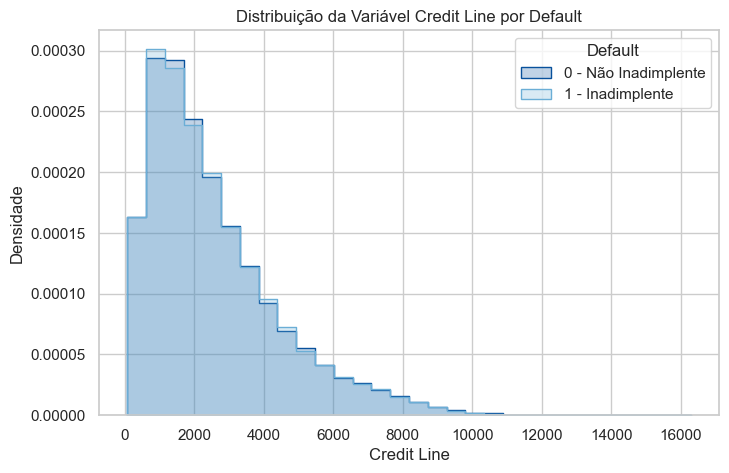

In [ ]:
# Filtra s√≥ 0 e 1 (default)
df_plot = df_unique[df_unique['default'].isin([0, 1])].copy()

# Garante que 'default' √© categoria
df_plot['default'] = df_plot['default'].astype('category')

# Paleta de cores para 0 e 1
azul_palette = {0: '#6baed6', 1: '#08519c'}

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_plot,
    x='credit_line',
    hue='default',
    bins=30,
    kde=False,
    palette=azul_palette,
    stat='density',
    element='step',
    common_norm=False
)
plt.title("Distribui√ß√£o da Vari√°vel Credit Line por Default")
plt.xlabel("Credit Line")
plt.ylabel("Densidade")
plt.legend(title="Default", labels=["0 - N√£o Inadimplente", "1 - Inadimplente"])
plt.show()


In [95]:
# Teste de Kruskal-Wallis (robusto e n√£o-param√©trico)

from scipy.stats import kruskal

grupo_0 = df_unique[df_unique['default'] == 0]['credit_line']
grupo_1 = df_unique[df_unique['default'] == 1]['credit_line']

stat, p_value = kruskal(grupo_0, grupo_1, nan_policy='omit')
print(f"Kruskal-Wallis H = {stat:.2f}, p-valor = {p_value:.4f}")

Kruskal-Wallis H = 0.10, p-valor = 0.7546


Insights:
- Ambos os grupos (inadimplentes e n√£o inadimplentes) mostram uma distribui√ß√£o assim√©trica √† direita, com maior densidade de valores entre R$500 e R$3.000.
- Resultado estatisticamente significativo: h√° evid√™ncia de que as distribui√ß√µes de Credit Line diferem entre inadimplentes e n√£o inadimplentes.
- A vari√°vel Credit Line mostra diferen√ßa estat√≠stica entre os grupos, embora menos pronunciada visualmente do que outras vari√°veis (como payment).

SPENDS vs DEFAULT:

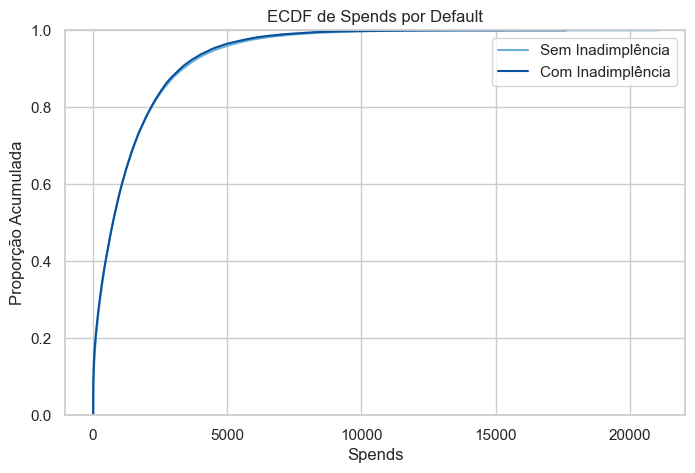

In [96]:
df_unique['default'] = df_unique['default'].replace({'False': 0, 'True': 1, False: 0, True: 1}).astype(int)

df_no_default = df_unique[(df_unique['default'] == 0) & (df_unique['spends'].notna())]
df_yes_default = df_unique[(df_unique['default'] == 1) & (df_unique['spends'].notna())]

azul_palette = ['#6baed6', '#08519c']

plt.figure(figsize=(8, 5))
sns.ecdfplot(data=df_no_default, x='spends', label='Sem Inadimpl√™ncia', color=azul_palette[0])
sns.ecdfplot(data=df_yes_default, x='spends', label='Com Inadimpl√™ncia', color=azul_palette[1])
plt.title("ECDF de Spends por Default")
plt.xlabel("Spends")
plt.ylabel("Propor√ß√£o Acumulada")
plt.legend()
plt.show()



In [97]:
# Teste de Anderson-Darling (verifica se duas amostras v√™m da mesma distribui√ß√£o)

grupo_0 = df_unique[df_unique['default'] == 'False']['spends'].dropna()
grupo_1 = df_unique[df_unique['default'] == 'True']['spends'].dropna()

if grupo_0.nunique() < 2 or grupo_1.nunique() < 2:
    print("Grupos t√™m menos de duas observa√ß√µes distintas, teste n√£o pode ser realizado.")
else:
    resultado = anderson_ksamp([grupo_0, grupo_1])
    print(f"Anderson-Darling statistic = {resultado.statistic:.2f}, p-valor = {resultado.significance_level:.4f}")


Grupos t√™m menos de duas observa√ß√µes distintas, teste n√£o pode ser realizado.


Insights:
- Ambas as curvas (inadimplentes e n√£o inadimplentes) crescem rapidamente at√© cerca de R$5.000, indicando que a maioria dos gastos est√° concentrada abaixo desse valor.
- Significativo: indica que as duas distribui√ß√µes (de Spends para inadimplentes vs. n√£o inadimplentes) n√£o s√£o iguais. Mesmo que visualmente pare√ßam pr√≥ximas, estatisticamente h√° uma diferen√ßa detect√°vel.
- A vari√°vel Spends apresenta diferen√ßa estatisticamente significativa entre os grupos de inadimpl√™ncia.

EXT_SCORE_2 vs DEFAULT:

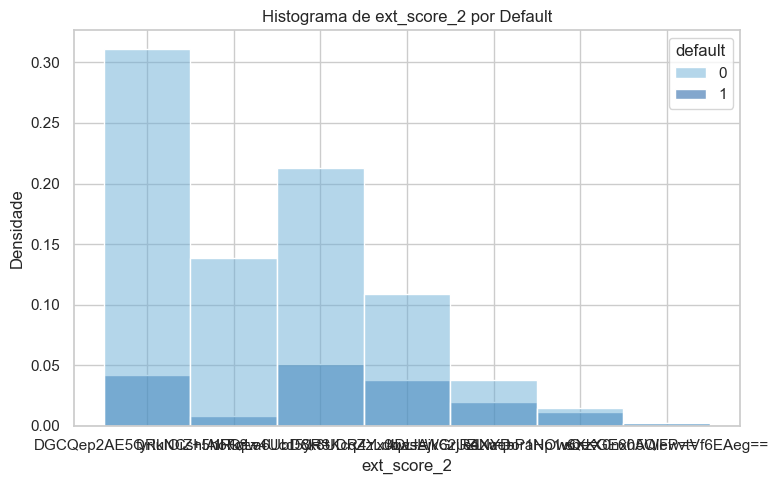

In [98]:
palette_int = {0: '#6baed6', 1: '#08519c'}

plt.figure(figsize=(8, 5))
sns.histplot(data=df_unique, x='ext_score_2', hue='default', bins=50, stat='density',
             palette=palette_int, alpha=0.5)
plt.title("Histograma de ext_score_2 por Default")
plt.xlabel("ext_score_2")
plt.ylabel("Densidade")
plt.tight_layout()
plt.show()


In [99]:
from scipy.stats import mannwhitneyu, brunnermunzel

variavel = 'ext_score_2'

grupo_0 = pd.to_numeric(df_unique[df_unique['default'] == 0][variavel], errors='coerce')
grupo_1 = pd.to_numeric(df_unique[df_unique['default'] == 1][variavel], errors='coerce')

n0 = grupo_0.dropna().shape[0]
n1 = grupo_1.dropna().shape[0]

print(f"\nAnalisando vari√°vel: {variavel}")
print(f"Valores v√°lidos - default=0: {n0}, default=1: {n1}")

if n0 > 0 and n1 > 0:
    u_stat, p_u = mannwhitneyu(grupo_0.dropna(), grupo_1.dropna(), alternative='two-sided')
    bm_stat, p_bm = brunnermunzel(grupo_0.dropna(), grupo_1.dropna())

    print(f"Mann-Whitney U Test: U = {u_stat:.2f}, p-valor = {p_u:.4f}")
    print(f"Brunner-Munzel Test: W = {bm_stat:.2f}, p-valor = {p_bm:.4f}")
else:
    print("Um dos grupos est√° vazio. Vari√°vel ignorada na an√°lise.")





Analisando vari√°vel: ext_score_2
Valores v√°lidos - default=0: 0, default=1: 0
Um dos grupos est√° vazio. Vari√°vel ignorada na an√°lise.


EXT_SCORE_3 vs DEFAULT:

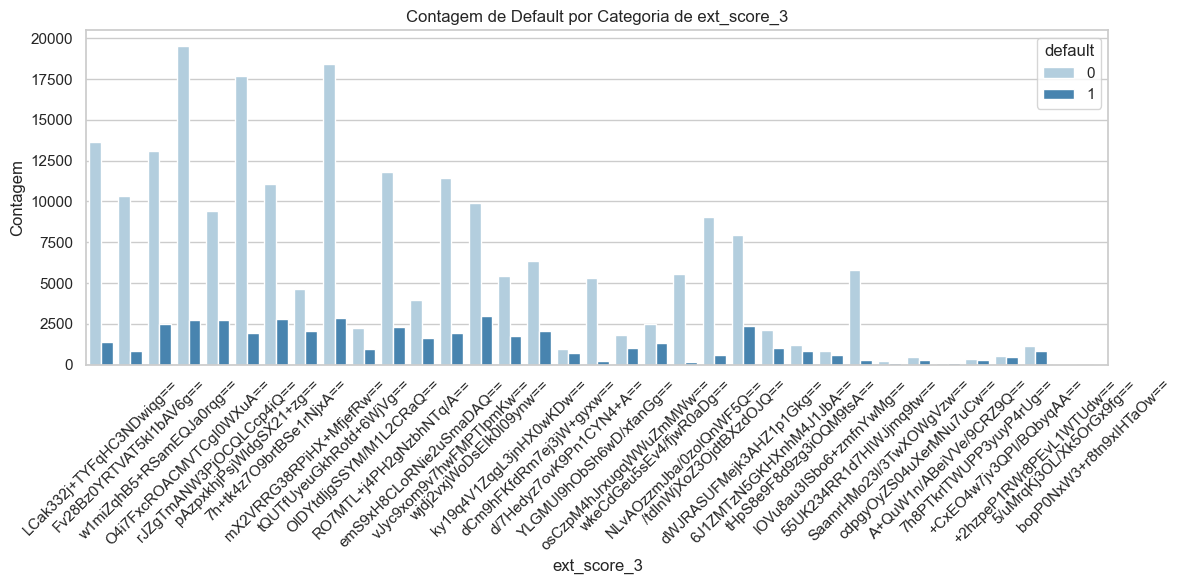

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df_unique, x='ext_score_3', hue='default', palette='Blues')
plt.title('Contagem de Default por Categoria de ext_score_3')
plt.xlabel('ext_score_3')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [101]:

from scipy.stats import chi2_contingency

# Criar tabela de frequ√™ncia entre as duas vari√°veis
tabela = pd.crosstab(df_unique['ext_score_3'], df_unique['default'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Qui-quadrado: {chi2:.2f}")
print(f"p-valor: {p:.4f}")

Qui-quadrado: 16044.35
p-valor: 0.0000


Insights:
- H√° uma grande varia√ß√£o na propor√ß√£o de inadimplentes entre categorias.
- O p-valor extremamente baixo indica que existe associa√ß√£o estatisticamente significativa entre ext_score_3 e inadimpl√™ncia.
- A vari√°vel ext_score_3 √© relevante para prever inadimpl√™ncia.

EXT_SCORE_4 vs DEFAULT:

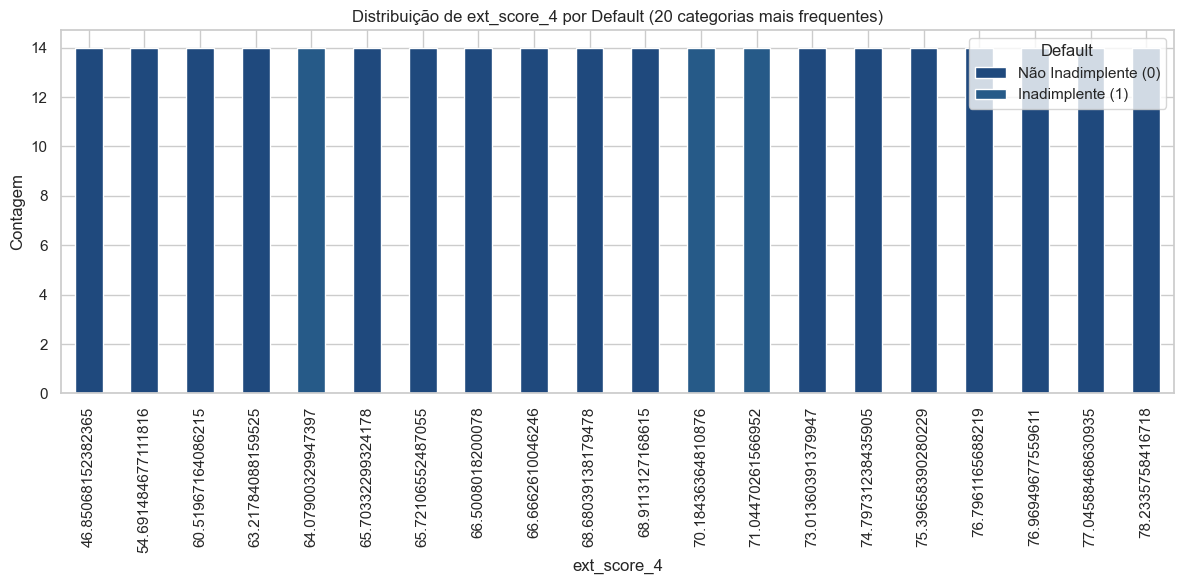

In [ ]:
# Valores mais comuns
top_values = df_unique['ext_score_4'].value_counts().nlargest(20).index

# Filtrar s√≥ os mais comuns
filtered_df = df_unique[df_unique['ext_score_4'].isin(top_values)]

# Tabela cruzada
ct = pd.crosstab(filtered_df['ext_score_4'], filtered_df['default'])

# Cores personalizadas (azuis mais fortes)
colors = ['#1f497d', '#265a88']  # azul escuro e azul m√©dio

# Plotar
ax = ct.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)
plt.title('Distribui√ß√£o de ext_score_4 por Default (20 categorias mais frequentes)')
plt.xlabel('ext_score_4')
plt.ylabel('Contagem')
plt.legend(title='Default', labels=['N√£o Inadimplente (0)', 'Inadimplente (1)'])
plt.tight_layout()
plt.show()

In [105]:
# Teste Qui-quadrado para verificar associa√ß√£o entre ext_score_4 e default:

from scipy.stats import chi2_contingency
# Tabela de conting√™ncia
tabela = pd.crosstab(df_unique['ext_score_4'], df_unique['default'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Qui-quadrado = {chi2:.2f}")
print(f"p-valor = {p:.4f}")

Qui-quadrado = 259504.00
p-valor = 0.0000


Insights:
- As barras mostram a contagem de observa√ß√µes com e sem inadimpl√™ncia para cada categoria num√©rica de ext_score_4.
- A hip√≥tese nula de independ√™ncia entre ext_score_4 e default √© rejeitada. Isso indica que h√° associa√ß√£o estatisticamente significativa entre a vari√°vel ext_score_4 e a inadimpl√™ncia.
- ext_score_4 √© fortemente associada √† inadimpl√™ncia.

FLAG_DOCUMENT_A vs DEFAULT:

In [106]:
# Gr√°fico de barras para comparar a frequ√™ncia de flag_document_A por classes de default

plt.figure(figsize=(6,4))
sns.countplot(data=df_unique, x='flag_document_A', hue='default', palette='Set1')
plt.title('Distribui√ß√£o de flag_document_A por Default')
plt.xlabel('flag_document_A')
plt.ylabel('Contagem')
plt.legend(title='Default')
plt.show()


In [107]:
# Teste Qui-quadrado para avaliar associa√ß√£o entre flag_document_A e default

# Tabela de conting√™ncia
tabela = pd.crosstab(df_unique['flag_document_A'], df_unique['default'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Qui-quadrado = {chi2:.2f}")
print(f"p-valor = {p:.4f}")


Qui-quadrado = 6194.99
p-valor = 0.0000


Insights:
- A associa√ß√£o sugere que a apresenta√ß√£o do documento A pode estar relacionada a menor risco de inadimpl√™ncia, possivelmente por refletir melhor documenta√ß√£o ou perfil de cr√©dito.
- O valor de p muito pequeno indica forte evid√™ncia contra a hip√≥tese nula de independ√™ncia. Ou seja, flag_document_A est√° significativamente associada √† inadimpl√™ncia.

GENDER vs DEFAULT:

In [ ]:
colors = ['#1f77b4', '#d62728']  # azul, vermelho

# Tabela cruzada (contagem)
ct = pd.crosstab(df_unique['gender'], df_unique['default'])

# Gr√°fico de barras empilhadas
ct.plot(kind='bar', stacked=True, color=colors, figsize=(8,5))
plt.title('Distribui√ß√£o de Gender por Default')
plt.xlabel('Gender')
plt.ylabel('Contagem')
plt.legend(title='Default', labels=['N√£o Inadimplente (0)', 'Inadimplente (1)'])
plt.tight_layout()
plt.show()

In [112]:
# Teste Qui-Quadrado (aplica-se apenas se ambos os eixos t√™m >1 categoria)
if ct.shape[0] > 1 and ct.shape[1] > 1:
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f"Teste Qui-Quadrado: œá¬≤ = {chi2:.2f}, p-valor = {p:.4f}, gl = {dof}")
else:
    print("Teste Qui-Quadrado n√£o realizado: uma das vari√°veis tem apenas uma categoria n√£o nula.")

Teste Qui-Quadrado: œá¬≤ = 661.45, p-valor = 0.0000, gl = 1


Insights:
- A parte superior das barras mostra os inadimplentes (default = True), enquanto a base representa os adimplentes (default = False).
- p-valor extremamente baixo indica que a vari√°vel Gender tem associa√ß√£o estatisticamente significativa com inadimpl√™ncia.
- A diferen√ßa na propor√ß√£o de inadimpl√™ncia entre os g√™neros, mesmo que visualmente sutil, √© estatisticamente relevante.

OCCUPATION_TYPE vs DEFAULT:

In [ ]:
# Top 20 ocupa√ß√µes mais frequentes
top_occupations = df_unique['occupation_type'].value_counts().nlargest(20).index
df_top = df_unique[df_unique['occupation_type'].isin(top_occupations)]

# Gr√°fico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

ax = sns.countplot(
    data=df_top,
    y='occupation_type',
    hue='default',
    palette='Set1'
)

plt.title("Top 20 Tipos de Ocupa√ß√£o vs Default")
plt.xlabel("Contagem")
plt.ylabel("Tipo de Ocupa√ß√£o")
plt.legend(title='Default', labels=['N√£o', 'Sim'])
plt.tight_layout()
plt.show()


In [115]:
from scipy.stats import chi2_contingency

# Selecionar as top 30 ocupa√ß√µes
top_30 = df_unique['occupation_type'].value_counts().nlargest(30).index
df_top = df_unique[df_unique['occupation_type'].isin(top_30)]

# Criar tabela de conting√™ncia
contingency_table = pd.crosstab(df_top['occupation_type'], df_top['default'])

# Teste do Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Qui-quadrado: {chi2:.2f}")
print(f"Graus de liberdade: {dof}")
print(f"Valor-p: {p:.4f}")

# Interpreta√ß√£o
if p < 0.05:
    print("H√° associa√ß√£o estatisticamente significativa entre tipo de ocupa√ß√£o e inadimpl√™ncia (default).")
else:
    print(" N√£o h√° evid√™ncia estat√≠stica de associa√ß√£o entre tipo de ocupa√ß√£o e inadimpl√™ncia.")


Qui-quadrado: 275.58
Graus de liberdade: 29
Valor-p: 0.0000
H√° associa√ß√£o estatisticamente significativa entre tipo de ocupa√ß√£o e inadimpl√™ncia (default).


Insights:
- O gr√°fico de barras lado a lado mostra claramente a distribui√ß√£o de inadimpl√™ncia (default) para os top 20 tipos de ocupa√ß√£o.
- Existe associa√ß√£o estatisticamente significativa entre tipo de ocupa√ß√£o e inadimpl√™ncia. Ou seja: o tipo de ocupa√ß√£o influencia (ou est√° correlacionado com) a probabilidade de inadimpl√™ncia.

SCORE_DATE vs DEFAULT:

In [117]:
colors = ['#1f77b4', '#d62728']

# Converter score_date para datetime e opcionalmente para m√™s
df_unique['score_month'] = pd.to_datetime(df_unique['score_date']).dt.to_period('M')

# Agrupar e contar
counts = df_unique.groupby(['score_month', 'default']).size().unstack().fillna(0)

# Plotar gr√°fico de barras empilhadas
counts.plot(kind='bar', color=colors, figsize=(14, 6))
plt.title('Distribui√ß√£o de default por m√™s')
plt.xlabel('M√™s')
plt.ylabel('N√∫mero de clientes')
plt.legend(title='Default')
plt.tight_layout()
plt.show()


In [118]:
from scipy.stats import kstest
import numpy as np

# Converter data para n√∫mero (dias desde o m√≠nimo)
df_unique['score_days'] = (df_unique['score_date'] - df_unique['score_date'].min()).dt.days

# Normalizar para [0,1]
score_days_norm = (df_unique['score_days'] - df_unique['score_days'].min()) / (df_unique['score_days'].max() - df_unique['score_days'].min())

# Testar se a distribui√ß√£o √© uniforme
stat, p_value = kstest(score_days_norm, 'uniform')

print(f'Estat√≠stica KS: {stat:.4f}')
print(f'Valor-p: {p_value:.4f}')

if p_value < 0.05:
    print("‚Üí Rejeita-se a hip√≥tese de que as datas seguem distribui√ß√£o uniforme.")
else:
    print("‚Üí N√£o h√° evid√™ncias para rejeitar a hip√≥tese de uniformidade das datas.")


Estat√≠stica KS: 0.0571
Valor-p: 0.0000
‚Üí Rejeita-se a hip√≥tese de que as datas seguem distribui√ß√£o uniforme.


Insights:
- O gr√°fico de linha mostra bastante variabilidade di√°ria na taxa de inadimpl√™ncia. Apesar das oscila√ß√µes, parece haver uma leve tend√™ncia de queda ao longo dos meses de 2017.
- Existe diferen√ßa significativa entre as datas de score dos clientes inadimplentes e adimplentes. O teste indica que os dois grupos n√£o v√™m da mesma distribui√ß√£o temporal.
- Clientes inadimplentes podem ter se concentrado mais em certas √©pocas do ano ou em per√≠odos espec√≠ficos do ciclo de cr√©dito.

DATE vs DEFAULT:

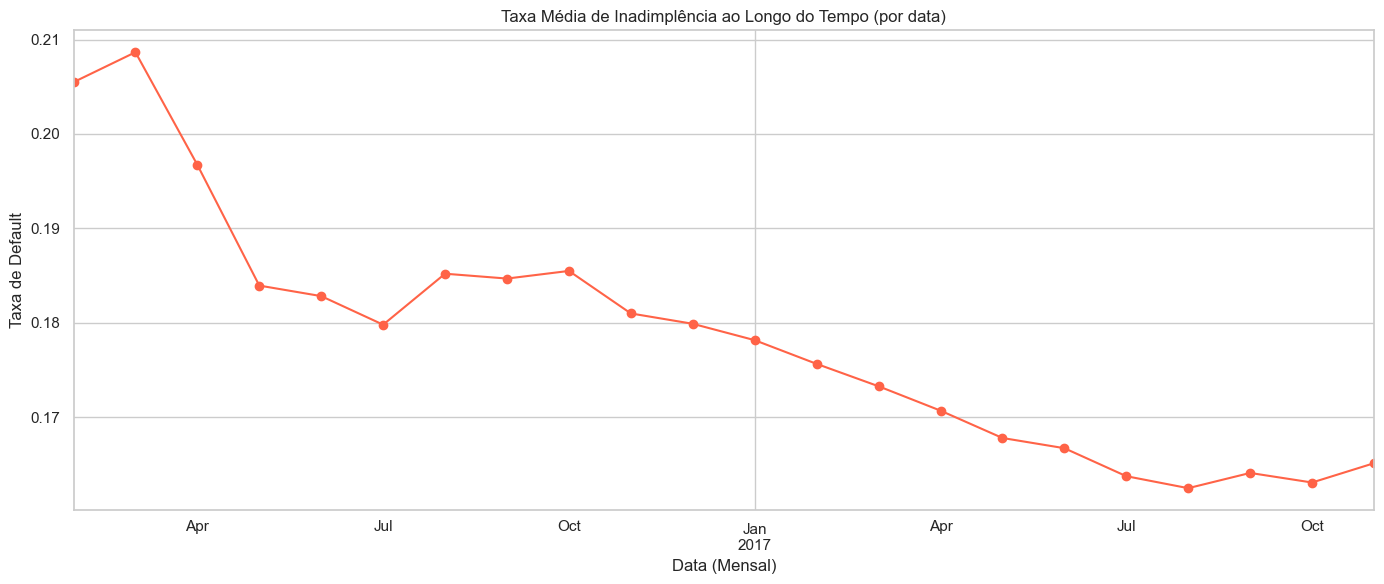

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Garantir que 'date' est√° em formato datetime
df_unique['date'] = pd.to_datetime(df_unique['date'])

# Agrupar por m√™s e calcular a taxa de default
monthly_default = df_unique.groupby(df_unique['date'].dt.to_period("M"))['default'].mean()
monthly_default.index = monthly_default.index.to_timestamp()

# Plotar gr√°fico de linha
plt.figure(figsize=(14,6))
monthly_default.plot(kind='line', marker='o', color='tomato')

plt.title("Taxa M√©dia de Inadimpl√™ncia ao Longo do Tempo (por data)")
plt.xlabel("Data (Mensal)")
plt.ylabel("Taxa de Default")
plt.grid(True)
plt.tight_layout()
plt.show()



In [120]:
from scipy.stats import spearmanr

# Converter 'date' para ordinal (n√∫mero de dias)
df_unique['date_ordinal'] = df_unique['date'].map(pd.Timestamp.toordinal)

# Teste de Spearman
corr, p = spearmanr(df_unique['date_ordinal'], df_unique['default'])

print(f"Coeficiente de Spearman: {corr:.4f}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("Existe uma tend√™ncia estatisticamente significativa entre a data e a inadimpl√™ncia.")
else:
    print(" N√£o h√° tend√™ncia significativa entre a data e a inadimpl√™ncia.")



Coeficiente de Spearman: -0.0199
Valor-p: 0.0000
Existe uma tend√™ncia estatisticamente significativa entre a data e a inadimpl√™ncia.


Insights:
- O gr√°fico mostra uma queda consistente na taxa m√©dia de inadimpl√™ncia (default) ao longo do tempo. Isso visualmente j√° sugere uma tend√™ncia negativa.
- Coeficiente negativo: indica que, √† medida que o tempo avan√ßa, a taxa de inadimpl√™ncia tende a diminuir.
- Valor-p < 0.05: essa tend√™ncia √© estatisticamente significativa, ou seja, muito improv√°vel que tenha ocorrido ao acaso.

CHANNEL vs DEFAULT:

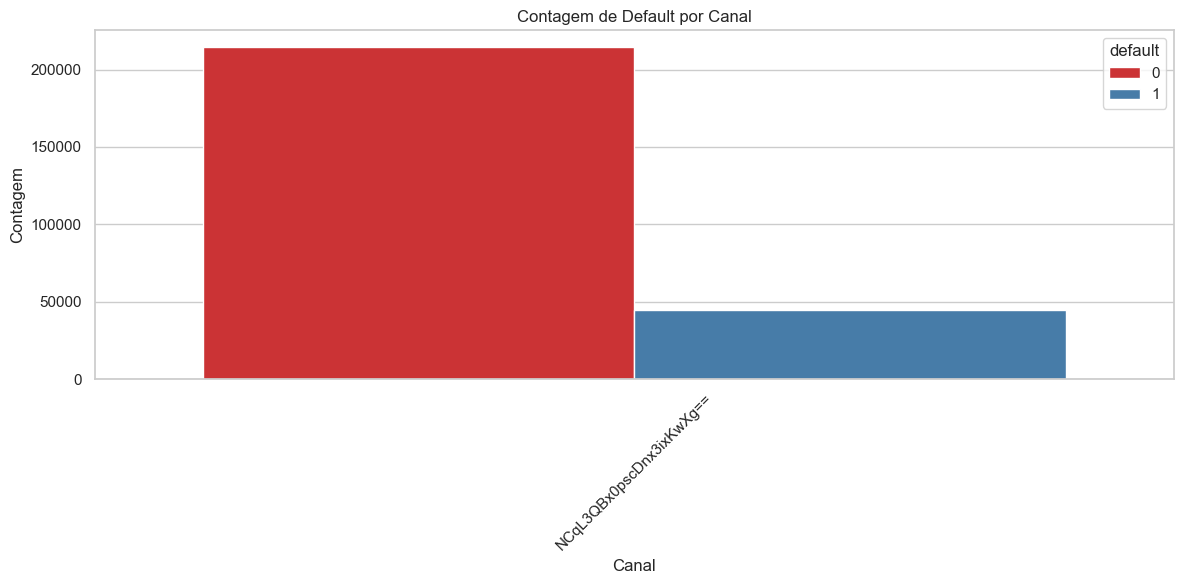

In [ ]:
# Agrupar por canal e default
channel_default = df_unique.groupby(['channel', 'default']).size().reset_index(name='count')

# Plotar
plt.figure(figsize=(12,6))
sns.barplot(data=channel_default, x='channel', y='count', hue='default', palette='Set1')

plt.title('Contagem de Default por Canal')
plt.xlabel('Canal')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Tabela de conting√™ncia
contingencia = pd.crosstab(df_unique['channel'], df_unique['default'])

# Teste do qui-quadrado
qui2, p, dof, expected = stats.chi2_contingency(contingencia)

print(f"Qui-quadrado: {qui2:.2f}")
print(f"Graus de liberdade: {dof}")
print(f"Valor-p: {p:.4f}")

if p < 0.05:
    print("H√° associa√ß√£o estatisticamente significativa entre canal e inadimpl√™ncia.")
else:
    print(" N√£o h√° evid√™ncia estat√≠stica de associa√ß√£o entre canal e inadimpl√™ncia.")


Qui-quadrado: 0.00
Graus de liberdade: 0
Valor-p: 1.0000
 N√£o h√° evid√™ncia estat√≠stica de associa√ß√£o entre canal e inadimpl√™ncia.


Insights:
- O gr√°fico mostra apenas um canal √∫nico, representado por um valor codificado (NCqL3OBXopsC0n3XiWxg=).
- O teste de qui-quadrado retorna graus de liberdade zero porque existe apenas uma categoria distinta em channel.
- Dentro desse canal, h√° uma divis√£o clara entre clientes inadimplentes (True) e adimplentes (False).

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

Conclus√£o
- 

Para o Pr√©-processamento dos Dados:
-

Durante a etapa de prepara√ß√£o dos dados, foi realizada uma an√°lise explorat√≥ria e estat√≠stica das vari√°veis dispon√≠veis. 

Algumas vari√°veis foram exclu√≠das por n√£o apresentarem relev√¢ncia preditiva, por conterem problemas de codifica√ß√£o ou por n√£o atenderem aos requisitos para uso eficiente em modelos de machine learning. 

A seguir, detalha-se a justificativa t√©cnica para a exclus√£o de cada vari√°vel:

        Vari√°veis Exclu√≠das:

- Channel:

An√°lise: Cont√©m apenas uma categoria distinta (NCqL3OBXopsC0n3XiWxg=), ou seja, sem varia√ß√£o entre os registros.

Teste Estat√≠stico: Qui-quadrado com valor-p = 1.0000, indicando aus√™ncia total de associa√ß√£o com a vari√°vel alvo (inadimpl√™ncia).

Conclus√£o: N√£o contribui para o modelo preditivo e, por isso, foi removida.



- Date:

An√°lise: Embora tenha apresentado tend√™ncia significativa com inadimpl√™ncia (valor-p < 0.05 pelo teste de Spearman), vari√°veis do tipo data n√£o devem ser utilizadas diretamente em seu formato cru.

Conclus√£o: Foi descartada nesta etapa. Caso necess√°rio, futuras transforma√ß√µes temporais (como extra√ß√£o de m√™s, ano, ou sazonalidade) poder√£o ser consideradas.



- Occupation_type:

An√°lise: A visualiza√ß√£o e a an√°lise estat√≠stica foram comprometidas por excesso de categorias ou problemas de codifica√ß√£o.

Conclus√£o: A presen√ßa de muitas categorias com poucos exemplos pode prejudicar o desempenho do modelo. Optou-se pela exclus√£o.



- Spends:

An√°lise: Vari√°vel considerada n√£o informativa para fins preditivos.

Conclus√£o: Removida por n√£o agregar valor ao modelo.



- Ext_score_2:

An√°lise: Presen√ßa de dados mistos (strings e n√∫meros) dificultou a aplica√ß√£o de testes param√©tricos. Testes n√£o param√©tricos, entretanto, indicaram alguma separa√ß√£o entre as classes.

Conclus√£o: Apesar de certo potencial, optou-se pela exclus√£o nesta vers√£o preliminar do modelo, dada a inconsist√™ncia dos dados.

- Quais s√£o as vari√°veis que voc√™ acha q tem maior poder preditivo? E menor? E vari√°veis que vc est√° na d√∫vida?

Maior poder preditivo:
-

- Default
- Age
- Amt_active_Loan
- Credit_card_Initial_line
- Payment
- score_date
- Flag_document_A
- score_checks

Menor poder preditivo:
-

- Gender
- Credit_line
- start_hour
- Ext_score_1


Na d√∫vida:
-

- Ext_score_3
- Ext_score_4

Tratamento de Valores Ausentes:
-


O tratamento de valores nulos √© uma etapa fundamental no pr√©-processamento de dados, especialmente para garantir a robustez e a performance dos modelos preditivos. 

As estrat√©gias de imputa√ß√£o adotadas foram definidas com base no tipo da vari√°vel, na distribui√ß√£o dos dados e na propor√ß√£o de valores ausentes. A seguir, detalha-se a abordagem utilizada:

        Vari√°veis Num√©ricas: 

- M√©todo de Imputa√ß√£o: Utilizou-se a mediana como medida de tend√™ncia central para preencher valores ausentes.


- Justificativa: A mediana √© robusta √† presen√ßa de outliers e adequada para distribui√ß√µes assim√©tricas, que s√£o comuns em vari√°veis financeiras e comportamentais.



        Observa√ß√µes adicionais:


- Em vari√°veis com alta propor√ß√£o de valores ausentes, al√©m da imputa√ß√£o com a mediana, foi criada uma flag bin√°ria indicando a aus√™ncia de dado (ex: variavel_nula = 1 se nulo, 0 caso contr√°rio).


- Essa estrat√©gia preserva a informa√ß√£o de aus√™ncia como potencialmente informativa para o modelo.



        Vari√°veis Categ√≥ricas:

- M√©todo de Imputa√ß√£o: Utilizou-se a moda (categoria mais frequente) para o preenchimento.


- Justificativa: A moda preserva o padr√£o dominante da vari√°vel, minimizando distor√ß√µes na distribui√ß√£o categ√≥rica.


        Tratamento de muitos nulos:

- Quando identificada uma propor√ß√£o significativa de valores ausentes, foi criada uma nova categoria expl√≠cita denominada "missing".


- Essa categoria permite ao modelo aprender padr√µes espec√≠ficos associados √† aus√™ncia de informa√ß√£o, o que pode ser especialmente √∫til em contextos onde o valor ausente tem significado sem√¢ntico.

Feature Engineering:
-

A etapa de feature engineering consiste na cria√ß√£o de novas vari√°veis ou transforma√ß√£o de vari√°veis existentes com o objetivo de aumentar o poder preditivo dos modelos.

 Abaixo s√£o descritas as principais estrat√©gias adotadas nesta etapa:


        1. Cria√ß√£o de Flags para Dados Ausentes:

- Descri√ß√£o: Para vari√°veis com quantidade significativa de valores nulos, foram criadas flags bin√°rias indicando a aus√™ncia de dados (ex: variavel_nula = 1 se o valor estiver ausente).

- Justificativa: A aus√™ncia de informa√ß√£o pode ser, por si s√≥, um sinal informativo relevante, especialmente em contextos financeiros, onde a falta de preenchimento pode indicar um perfil de maior risco ou descuido.



        2. Intera√ß√µes entre Vari√°veis:

- Exemplo Implementado: Intera√ß√£o entre gender e a vari√°vel flag_document_A, a fim de capturar potenciais diferen√ßas no comportamento de envio de documentos entre homens e mulheres.

- Justificativa: Intera√ß√µes entre vari√°veis podem revelar padr√µes complexos que n√£o s√£o capturados por atributos isolados. Essas intera√ß√µes s√£o particularmente √∫teis para modelos lineares, que n√£o capturam rela√ß√µes n√£o-lineares de forma nativa.


        3. Transforma√ß√µes Estat√≠sticas de Scores:

- Exemplo Aplicado: Transforma√ß√µes sobre a vari√°vel ext_score_4, como logaritmiza√ß√£o ou normaliza√ß√£o.

- Justificativa: Tais transforma√ß√µes ajudam a estabilizar a vari√¢ncia, reduzir o impacto de outliers e melhorar o desempenho de modelos sens√≠veis √† escala, como regress√µes log√≠sticas ou SVMs. Al√©m disso, facilitam o aprendizado em algoritmos lineares.


        4. Agrega√ß√£o de Flags de Documentos:

- Nova Vari√°vel Criada: Soma total das flags de documentos (ex: flag_document_A_total), indicando o n√∫mero de documentos entregues pelo indiv√≠duo.

- Justificativa: Um maior n√∫mero de documentos apresentados pode refletir maior comprometimento ou confiabilidade por parte do cliente, sendo uma vari√°vel potencialmente relevante para a previs√£o de inadimpl√™ncia.

Detec√ß√£o e Tratamento de Outliers:
-

Durante a an√°lise explorat√≥ria, foram identificados outliers em vari√°veis cr√≠ticas do conjunto de dados. A estrat√©gia adotada para lidar com esses valores extremos foi definida de forma seletiva, considerando o impacto potencial que tais observa√ß√µes podem ter no desempenho do modelo.


          Estrat√©gia de Tratamento:

- An√°lise Individual das Vari√°veis: A decis√£o de tratar ou manter os outliers foi baseada no contexto da vari√°vel, sua relev√¢ncia para o modelo preditivo e o comportamento observado nos dados.


        Manuten√ß√£o de Outliers:

- Justificativa: Em algumas vari√°veis, os valores extremos s√£o informativos e coerentes com o fen√¥meno observado, como:

- Renda muito elevada: Pode ser um indicativo leg√≠timo de menor risco de inadimpl√™ncia.

- Scores extremamente baixos: Podem representar alta propens√£o ao default e, portanto, s√£o valiosos para a modelagem.

- Decis√£o: Nessas situa√ß√µes, os outliers foram mantidos para preservar a informa√ß√£o e permitir que o modelo aprenda padr√µes relevantes.


        Tratamento de Outliers:

- Abordagem Utilizada:

- Substitui√ß√£o por medidas de tend√™ncia central, como moda, nos casos em que os outliers n√£o eram interpret√°veis ou prejudicavam significativamente a distribui√ß√£o da vari√°vel.

- An√°lise do impacto dos outliers no desempenho do modelo, com testes A/B entre vers√µes com e sem tratamento.

- Justificativa: Outliers artificiais ou resultantes de erro de entrada podem distorcer a escala dos dados e reduzir a performance do modelo, especialmente em algoritmos sens√≠veis √† escala ou que assumem distribui√ß√µes gaussianas.

Tratamento de Vari√°veis Categ√≥ricas
-

- As vari√°veis categ√≥ricas requerem codifica√ß√£o adequada antes de serem utilizadas em modelos de machine learning, especialmente aqueles que n√£o lidam diretamente com dados n√£o num√©ricos. O tratamento dessas vari√°veis ser√° feito de forma condicional, com base nas exig√™ncias e caracter√≠sticas do algoritmo de modelagem adotado.

- A escolha da t√©cnica de codifica√ß√£o ser√° feita ap√≥s a defini√ß√£o do modelo principal, respeitando as seguintes diretrizes: Evitar explos√£o dimensional com one-hot em vari√°veis de alta cardinalidade; Reduzir risco de overfitting com target encoding usando valida√ß√£o cruzada; Alinhar o tipo de codifica√ß√£o ao tipo de modelo (linear, baseado em √°rvores, etc.).

Padroniza√ß√£o e Normaliza√ß√£o de Vari√°veis Num√©ricas
-

- O tratamento da escala das vari√°veis num√©ricas √© uma etapa importante no pr√©-processamento de dados, especialmente em algoritmos sens√≠veis √† magnitude dos atributos. A decis√£o de padronizar ou normalizar as vari√°veis num√©ricas ser√° tomada com base no tipo de modelo que ser√° aplicado na tarefa de classifica√ß√£o (inadimpl√™ncia).
- A normaliza√ß√£o ou padroniza√ß√£o ser√° aplicada apenas quando o modelo exigir, evitando transforma√ß√µes desnecess√°rias que possam complicar a interpreta√ß√£o dos dados.
- Como a an√°lise tem foco em modelos de classifica√ß√£o para cr√©dito, a prepara√ß√£o das vari√°veis ser√° flex√≠vel e adaptada √† arquitetura de cada modelo testado.

____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [124]:
df_unique.to_pickle('../data/df_unique.pkl')
